In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and direc

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


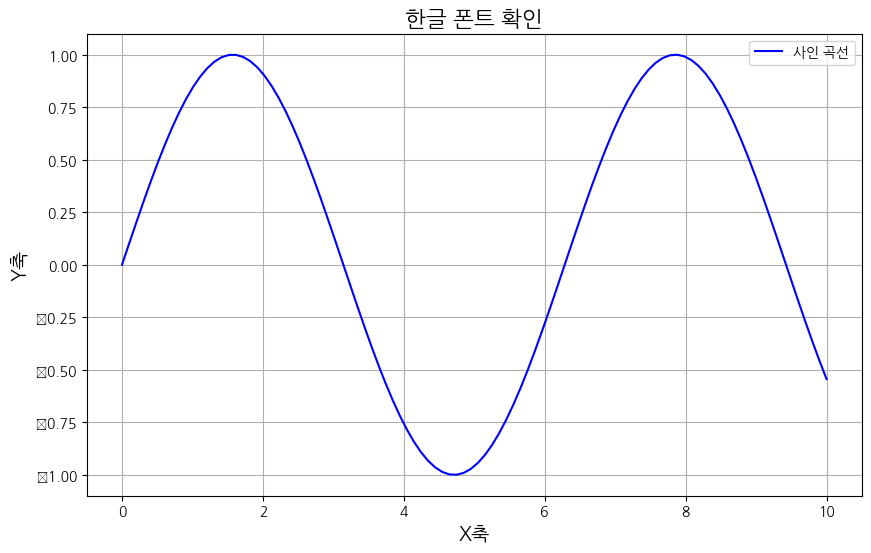

In [3]:
# 임의의 데이터 생성
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 간단한 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='사인 곡선', color='blue')
plt.title('한글 폰트 확인', fontsize=16)
plt.xlabel('X축', fontsize=14)
plt.ylabel('Y축', fontsize=14)
plt.legend()
plt.grid()

# 결과 출력
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_excel("/content/drive/MyDrive/(임형수)_2023_12_24_643,306.xlsx")
df.head()

,좌석수,공연코드,공연일시,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식명(관리시스템),할인금액,할인종류명(전송처),...,공연종료일자,장르명,공연지역명,출연진내용,아동공연 여부,내한공연 여부,오픈런 여부,판매시작일시,판매종료일시,좌석등급
0,160,PF350480,2023-12-24 10:30,2023-12-23 13:56,1,1,35000,모바일,0,NaN,...,2024-06-30,연극,서울,"정해빈, 신서진, 김보람, 신희진, 이세형, 이시운, 류권하 등",N,N,Y,2023/11/24 11:13:53,2099/12/31 23:59:59,전석(35000)
1,160,PF350480,2023-12-24 10:30,2023-12-23 13:56,1,1,35000,모바일,0,NaN,...,2024-06-30,연극,서울,"정해빈, 신서진, 김보람, 신희진, 이세형, 이시운, 류권하 등",N,N,Y,2023/11/24 11:13:53,2099/12/31 23:59:59,전석(35000)
2,60,PF454103,2023-12-24 10:30,2023-12-22 10:05,1,1,20000,모바일,5000,온라인예매가,...,2024-02-29,서커스/마술,경상도,NaN,Y,N,N,2023/12/16 00:00:00,2024/02/29 00:00:00,전석(25000)
3,60,PF454103,2023-12-24 10:30,2023-12-22 10:05,1,1,20000,모바일,5000,온라인예매가,...,2024-02-29,서커스/마술,경상도,NaN,Y,N,N,2023/12/16 00:00:00,2024/02/29 00:00:00,전석(25000)
4,60,PF454103,2023-12-24 10:30,2023-12-22 10:05,1,1,20000,모바일,5000,온라인예매가,...,2024-02-29,서커스/마술,경상도,NaN,Y,N,N,2023/12/16 00:00:00,2024/02/29 00:00:00,전석(25000)


# 데이터 전처리

## 예매취소 데이터 제거

In [6]:
df['예매/취소구분'].value_counts()

,count
예매/취소구분,
1,451536
2,191770


In [7]:
df=df[df['예매/취소구분']==1]
df['예매/취소구분'].value_counts()

,count
예매/취소구분,
1,451536


## 연령

In [8]:
df['연령'].describe()

,연령
count,451536.000000
mean,1534.399372
std,834.106626
min,0.000000
25%,1966.000000
50%,1985.000000
75%,1993.000000
max,2023.000000


In [9]:
df['연령']=2024-df['연령']+1
df['연령'].describe()

,연령
count,451536.000000
mean,490.600628
std,834.106626
min,2.000000
25%,32.000000
50%,40.000000
75%,59.000000
max,2025.000000


In [10]:
df['연령'].head(10)

,연령
0,2025
1,2025
2,43
3,43
4,43
5,43
6,81
7,81
8,39
9,39


0에서 100 사이는 모두 이상치이지만, 일단은 드롭하지 않는다.

## 아동공연

In [11]:
df['아동공연 여부'].value_counts()

,count
아동공연 여부,
N,369455
Y,82081


In [12]:
df=df[df['아동공연 여부']=='N']
df['아동공연 여부'].value_counts()

,count
아동공연 여부,
N,369455


## 모바일, 웹만 남기기

In [13]:
df['예매/취소방식명(관리시스템)'].value_counts()

,count
예매/취소방식명(관리시스템),
모바일,166242
웹,125851
현장,51544
기타,23930
전화,1888


In [14]:
df=df[(df['예매/취소방식명(관리시스템)']=='웹')|
      (df['예매/취소방식명(관리시스템)']=='모바일')]

df['예매/취소방식명(관리시스템)'].value_counts()

,count
예매/취소방식명(관리시스템),
모바일,166242
웹,125851


## 극장 규모 칼럼

연극/ 뮤지컬 별로 다르다.

<연극>

소극장 : 100석 미만
중극장 : 100- 300
대극장 : 300초과
<뮤지컬>

소극장 : 300석 이하
중극장 : 300 - 1000
대극장 : 1000석 이상
-> 소극장 = 0,중극장 =1, 대극장=2

In [15]:
# 연극과 뮤지컬 데이터만 필터링
df_filtered = df[(df['장르명'] == '연극') | (df['장르명'] == '뮤지컬')]

# 극장 크기 분류 함수 정의
def categorize_theater(row):
    if row['장르명'] == '연극':
        if row['좌석수'] < 100:
            return 0  # 소극장
        elif 100 <= row['좌석수'] < 300:
            return 1  # 중극장
        else:
            return 2  # 대극장
    elif row['장르명'] == '뮤지컬':
        if row['좌석수'] <= 300:
            return 0  # 소극장
        elif 300 < row['좌석수'] < 1000:
            return 1  # 중극장
        else:
            return 2  # 대극장

# 분류 기준 적용
df_filtered['극장규모'] = df_filtered.apply(categorize_theater, axis=1)
df_filtered['극장규모'].value_counts()

<ipython-input-15-a25025beb368>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['극장규모'] = df_filtered.apply(categorize_theater, axis=1)


,count
극장규모,
2,42026
1,41233
0,11457


In [16]:
df_filtered.groupby('장르명')['극장규모'].value_counts()

장르명  극장규모
뮤지컬  2       35502
     1       16795
     0        7939
연극   1       24438
     2        6524
     0        3518
Name: count, dtype: int64

In [17]:
df=df_filtered
df.groupby('장르명')['극장규모'].value_counts()

장르명  극장규모
뮤지컬  2       35502
     1       16795
     0        7939
연극   1       24438
     2        6524
     0        3518
Name: count, dtype: int64

## 재관람 칼럼

재관람 = 1, 아니면 0

In [18]:
df['할인종류명(전송처)'].unique()

array([nan, '2차 크리스마스 뭉쳐라4인', '2차 크리스마스 의뢰인 할인', '3차 크리스마스 뭉쳐라3인',
       '3차 크리스마스 의뢰인 할인', 'N', '정상가', '공연사 할인', '김종욱 찾기', '크리스마스 특별할인',
       '기타', '판매자 할인쿠폰', '없음', '크리스마스 얼리버드 할인', '[12월 공연티켓 연말쿠폰] 비씨카드',
       '[12월 공연티켓 연말쿠폰] 삼성카드', '[크리스마스] 조기예매 1인', '[크리스마스] 할인 1인', '일반',
       '크리스마스 1인관람권', '인스타팔로우할인선착순 1인가', '크리스마스선착순1인가', '해녀 다이닝_런치 코스',
       '1차 크리스마스 뭉쳐라4인', '크리스마스 1차 뭉쳐라4인!', '크리스마스 1차 뭉쳐라3인!',
       '크리스마스 2차 일반 할인', '크리스마스 2차 뭉쳐라3인!', '크리스마스 2차 뭉쳐라4인!',
       '크리스마스 3차 뭉쳐라4인!', '크리스마스 3차 일반 할인', '크리스마스 3차 뭉쳐라3인!',
       '크리스마스 얼리버드', '크리스마스 2차 얼리버드', '크리스마스 깜짝 할인', '크리스마스 할인',
       '크리스마스 할인가', '조조할인', '크리스마스 특별 할인', '크리스마스 특가할인', '핫세일',
       '전석_크리스마스할인(조조)', '크리스마스', '정가', '크리스마스 관람권', '크리스마스 조기예매할인',
       '크리스마스 특가(비지정석)', '크리스마스 할인세일', '함께즐겨요크리스마스특별할인', '크리스마스 선착순할인',
       '해녀이야기', '[크리스마스] 얼리버드', '[크리스마스] 2차 얼리버드', '[크리스마스] 할인', '성탄티켓',
       '커플티켓(2인)', '크리스마스할인(2인)', '크리스마스특가(1인)', '크리스마스할인(1인)',
       '1차 크리스마스 뭉쳐라3인', '2차 크리스마스 뭉쳐라3인', '3차 크

In [19]:
lst= ['고양문화재단회원 10,000원', '재관람할인', 'R석 재관람할인(1인1매)', '재관람할인(본인만)','R석 미드나잇 마니아 할인(본인만)',
       'R석 재관람 할인(본인만)', '엔톡(NTOK)회원 10%', '예술인패스카드 30%','파크컴퍼니 매니아 20%','VIP석 〈마리 퀴리〉 재관람 할인(1인1매)',
       '재관람 할인 (실물 유료 티켓  소지자 할인)','재관람 할인(1인1매)', 'S석 재관람카드 50% 할인권(1인1매)',
       'VIP석 재관람할인(2023~24년 유료,1인1매)',
       'B석 재관람할인(2023~24년 유료,1인1매)', 'R석 재관람할인(2023~24년 유료,1인1매)',
       'S석 재관람할인(2023~24년 유료,1인1매)',
       '재관람 할인(1인2매)30%', '재관람 할인(2023~24년 유료,1인1매)', '재관람 할인(본인만)',
          'R석 재관람 할인(1인1매)', 'OP석 재관람할인(1인1매)',
        '재관람할인(2023~24년 유료,1인1매)',
       '재관람 할인(미공개 스틸컷 포스터북 증정)',  'S석 재관람(지난유료티켓 소지자)',
       'R석 재관람(지난유료티켓 소지자)',  '예술인관계자',
        '<조씨고아...>재관람20%_명동예술극장공연', '국립극단연극인회원50%_본인만', '예술인패스', 'ARKO 일반회원',
        'ARKO 공연예술인회원', 'ARKO 매니아회원',  '극단 산수유 매니아', '서울연극협회회원',  '엔톡(NTOK)회원 20%', '전석 유료티켓 소지자할인', '어댑터 마니아 할인',
        'R석 재관람카드 40% 할인권(1인1매)','예술나눔 회원', '연극인할인' , 'N차관람할인(5회/본인만)', 'N차관람할인(4회/본인만)', '예술인 할인(본인만)30%', '재관람할인(1인1매)',
       'VIP석 재관람할인(1인1매)', 'S석 재관람할인(1인1매)', '예술인할인', '재관람', 'R석 재관람카드 50% 할인권(1인1매)', 'N차관람할인(3회/본인만)', '재관람 할인']

# '할인종류명(전송처)'이 lst에 있으면 '재관람' 칼럼에 1을, 아니면 0을 부여
df['재관람'] = df['할인종류명(전송처)'].apply(lambda x: 1 if x in lst else 0)

# 결과 확인
df['재관람'].value_counts()

,count
재관람,
0,94274
1,442


## 조기예매 여부 칼럼


1) 데이터 필터링

2) 새로운 파생변수 조기예매 여부: 조기예매면 1, 아니면 0

abs(예매취소일시 - 판매시작일시) = 10

In [20]:
df['판매시작일시'].head()

,판매시작일시
0,2023/11/24 11:13:53
1,2023/11/24 11:13:53
11,2023/11/06 09:00:00
12,2023/11/06 09:00:00
13,2023/11/06 09:00:00


In [21]:
# 1. 판매시작일시 열이 문자열이 아닌 경우, 문자열로 변환
df['판매시작일시'] = df['판매시작일시'].astype(str)

# 2. 결측치 처리: 판매시작일시가 9999년, 2099년, 2021년인 경우 NaT로 처리
df.loc[df['판매시작일시'].str[:4].isin(['9999', '2099', '2021']), '판매시작일시'] = pd.NaT

# 3. 판매시작일시와 예매/취소일시를 datetime 형식으로 변환
df['판매시작일시'] = pd.to_datetime(df['판매시작일시'], errors='coerce')
df['예매/취소일시'] = pd.to_datetime(df['예매/취소일시'], errors='coerce')

# 4. 조기예매 판정: 예매/취소일시와 판매시작일시의 차이가 10일 이하인 경우 1, 그렇지 않으면 0
df['조기예매'] = (df['예매/취소일시'] - df['판매시작일시']).dt.days <= 10

# True/False 값을 1/0으로 변환
df['조기예매'] = df['조기예매'].astype(int)

# 결과 확인
print(df['조기예매'].value_counts())

조기예매
0    56737
1    37979
Name: count, dtype: int64


In [22]:
# 전처리완료 데이터 저장
df.to_excel("/content/drive/MyDrive/KOPIS공모전/데이터/EDA용 데이터/20191224.xlsx",
            index=False)

## 연극 뮤지컬 데이터 분리

In [23]:
df['장르명'].value_counts()

,count
장르명,
뮤지컬,60236
연극,34480


In [24]:
df_play = df[df['장르명']=='연극']
df_musical= df[df['장르명']=='뮤지컬']

# EDA_연극

### 공연코드

In [25]:
df_play['공연코드'].value_counts()

,count
공연코드,
PF394750,1102
PF343804,1039
PF440457,1031
PF392163,999
PF437423,872
...,...
PF454703,2
PF452813,2
PF453834,2


### 공연일시에 따른 가격

<ipython-input-26-8228dca8b27c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play['공연일시']=pd.to_datetime(df_play['공연일시'])


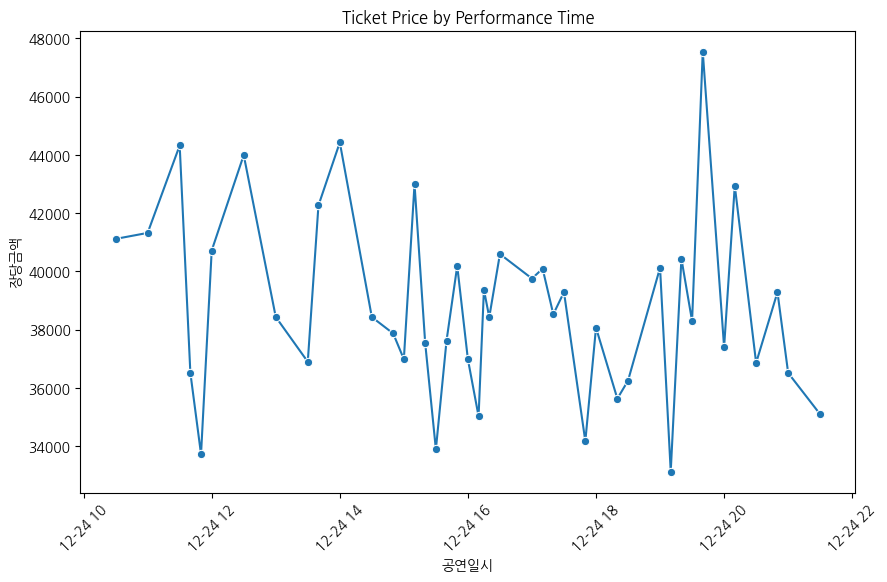

In [26]:
df_play['공연일시']=pd.to_datetime(df_play['공연일시'])

# 시각화: 공연일시별 평균 장당금액 변화
mean_price = df_play.groupby('공연일시')['장당금액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='공연일시', y='장당금액', data=mean_price, marker='o')
plt.title('Ticket Price by Performance Time')
plt.xticks(rotation=45)
plt.show()

### 예매/취소 매수

In [27]:
df_play['예매/취소매수'].value_counts()

,count
예매/취소매수,
1,34480


### 예매/취소 금액

In [28]:
df_play['예매/취소금액'].value_counts()

,count
예매/취소금액,
35000,3895
30000,3771
25000,3400
40000,2439
36000,1834
...,...
5990,1
120000,1
23230,1


In [29]:
df_play['예매/취소금액'].value_counts().sort_index(ascending=False)

,count
예매/취소금액,
131600,26
120000,1
115000,4
111600,26
101700,20
...,...
8000,8
7900,12
5990,1


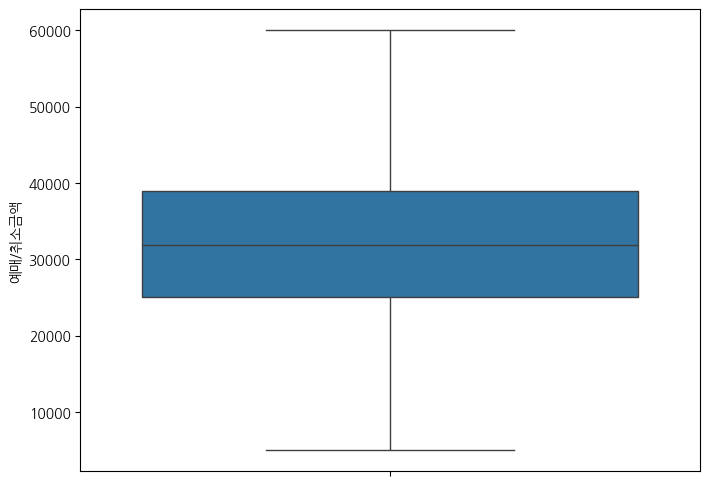

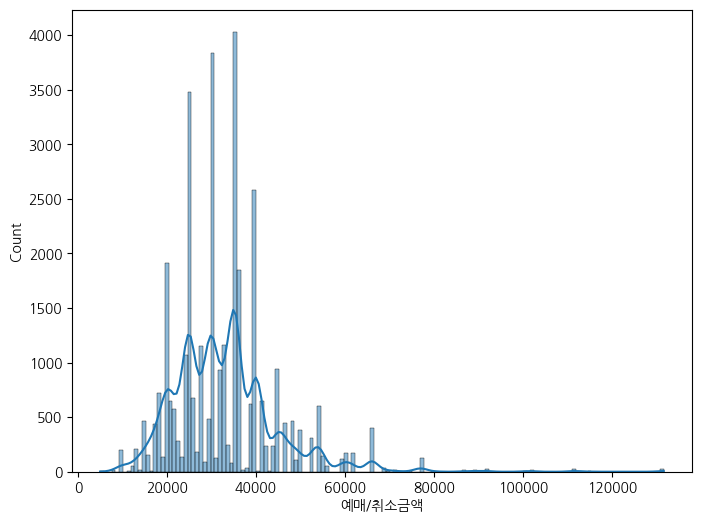

In [30]:
# 예매취소금액 분포
# 예매취소금액이 0인 것은 결측치로 처리하고 제거

df_play_price=df_play[df_play['예매/취소금액']!=0]

# 시각화: 금액 분포 박스 플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='예매/취소금액', data=df_play_price, showfliers=False)
plt.show()

# 시각화: 금액 분포 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(df_play_price['예매/취소금액'], kde=True)
plt.show()

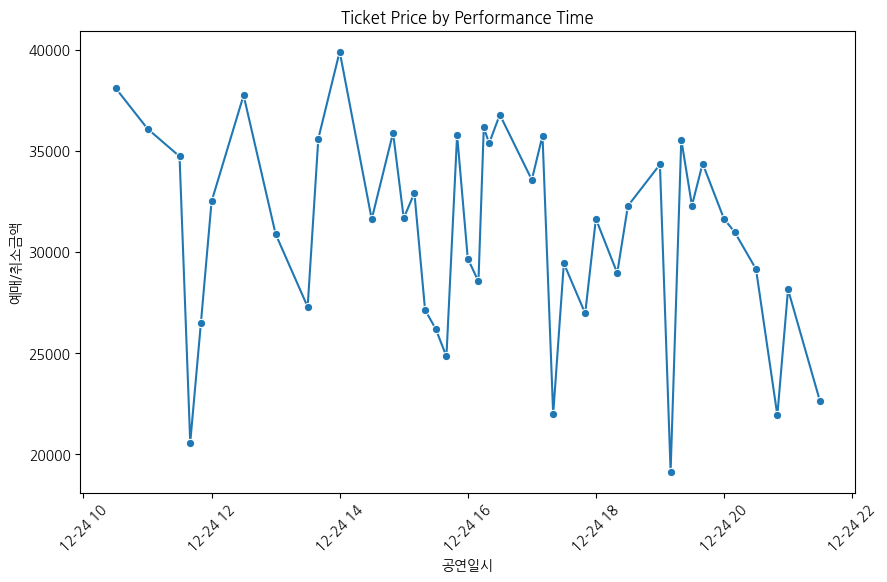

In [31]:
# 시각화: 공연일시별 평균 예매금액 변화
mean_price = df_play_price.groupby('공연일시')['예매/취소금액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='공연일시', y='예매/취소금액', data=mean_price, marker='o')
plt.title('Ticket Price by Performance Time')
plt.xticks(rotation=45)
plt.show()

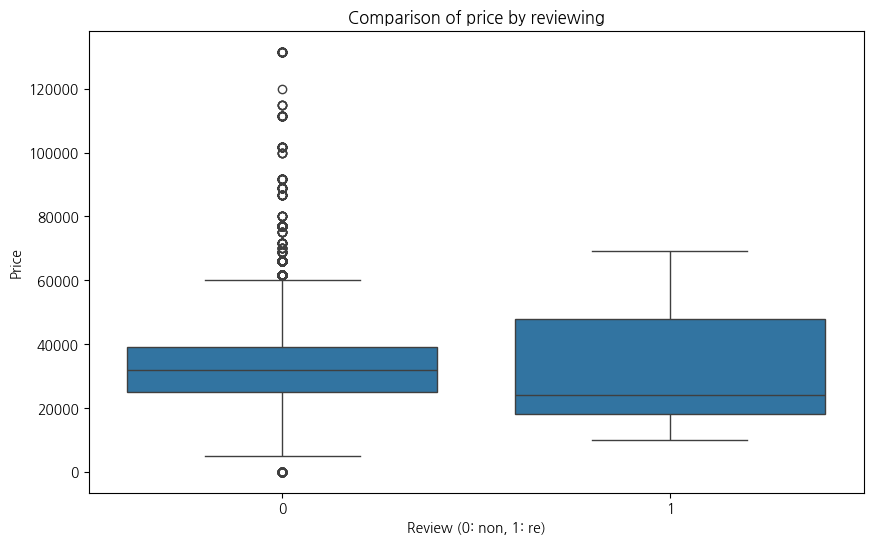

In [32]:
# 재관람과 비재관람 데이터의 예매/취소 금액 차이

# 박스 플롯 시각화: 재관람 여부에 따른 예매/취소금액 비교
plt.figure(figsize=(10, 6))
sns.boxplot(x='재관람', y='예매/취소금액', data=df_play)
plt.title('Comparison of price by reviewing')
plt.xlabel('Review (0: non, 1: re)')
plt.ylabel('Price')
plt.show()

### 예매/취소방식명

In [33]:
df_play['예매/취소방식명(관리시스템)'].value_counts()

,count
예매/취소방식명(관리시스템),
모바일,27242
웹,7238


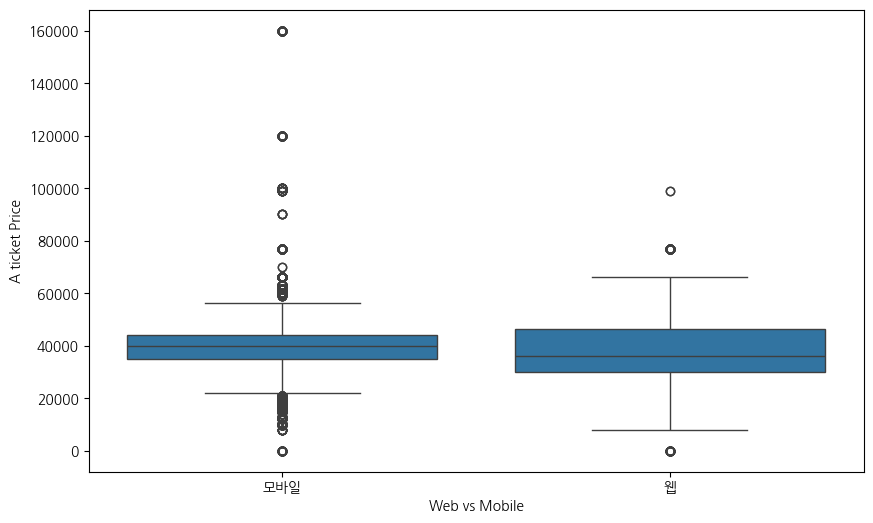

In [34]:
# 장당금액 웹 vs 모바일
plt.figure(figsize=(10, 6))
sns.boxplot(x='예매/취소방식명(관리시스템)', y='장당금액', data=df_play)
plt.xlabel('Web vs Mobile')
plt.ylabel('A ticket Price')
plt.show()

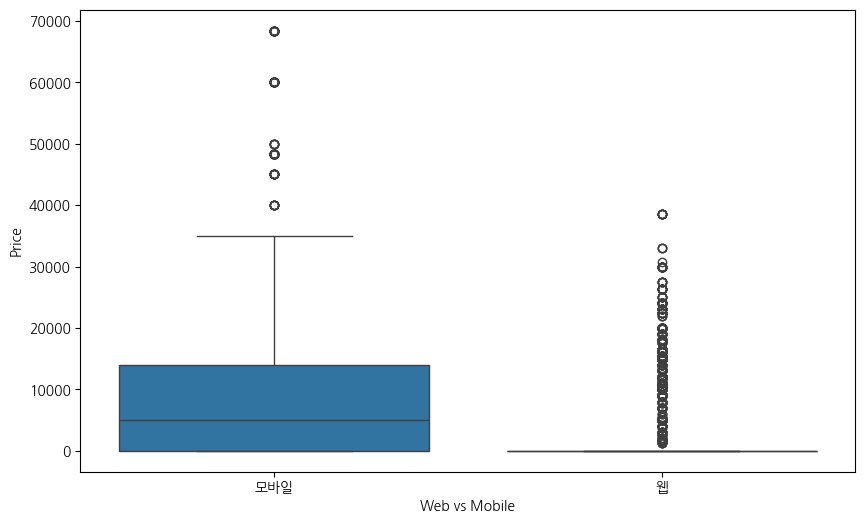

In [35]:
# 할인금액 웹 vs 모바일
# 시각화: 웹 vs 모바일 장당금액 비교 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='예매/취소방식명(관리시스템)', y='할인금액', data=df_play)
plt.xlabel('Web vs Mobile')
plt.ylabel('Price')
plt.show()

모바일이 웹보다 더 많은 금액을 할인받는다.

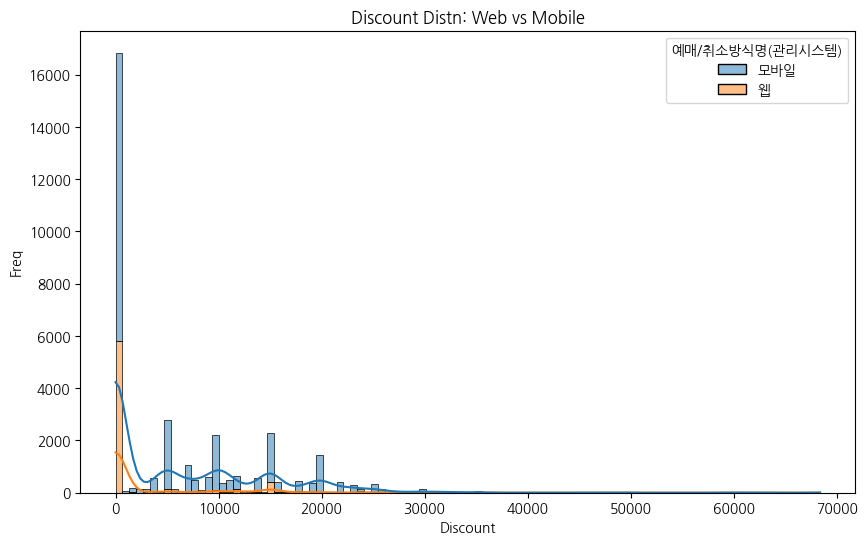

In [36]:
# 할인금액의 분포를 히스토그램으로 시각화 (웹 vs 모바일)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_play, x='할인금액', hue='예매/취소방식명(관리시스템)', kde=True, multiple='stack')
plt.title('Discount Distn: Web vs Mobile')
plt.xlabel('Discount')
plt.ylabel('Freq')
plt.show()



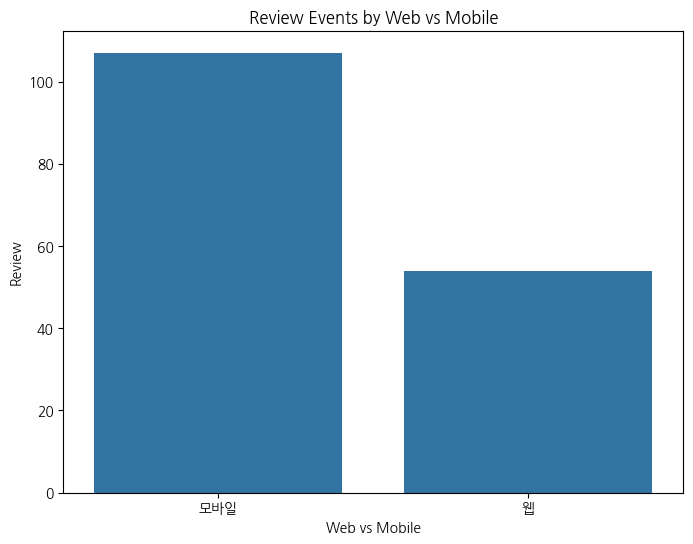

In [37]:
# 구매처 별 재관람 건수 시각화
revisit_ratio = df_play.groupby('예매/취소방식명(관리시스템)')['재관람'].sum().reset_index()

# 바 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='예매/취소방식명(관리시스템)', y='재관람', data=revisit_ratio)
plt.title('Review Events by Web vs Mobile')
plt.xlabel('Web vs Mobile')
plt.ylabel('Review')
plt.show()

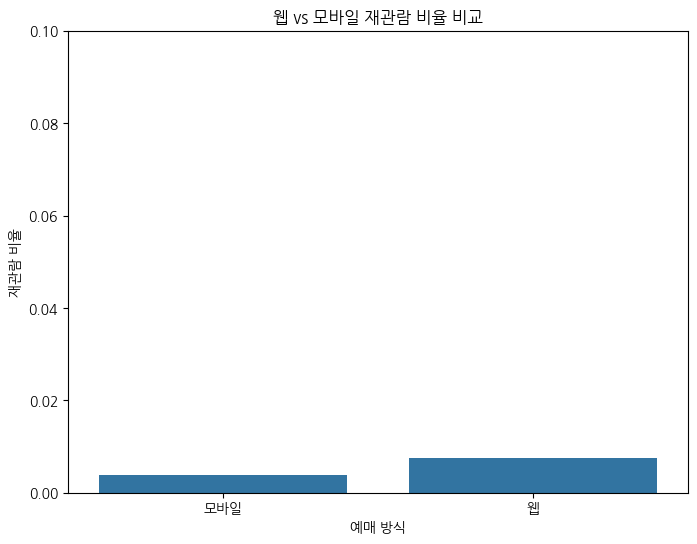

In [38]:
# 예매방식명별로 재관람 비율 계산
# 재관람의 비율은 '재관람' 값이 1인 경우의 평균으로 계산할 수 있습니다.
revisit_ratio = df_play.groupby('예매/취소방식명(관리시스템)')['재관람'].mean().reset_index()

# 바 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='예매/취소방식명(관리시스템)', y='재관람', data=revisit_ratio)
plt.title('웹 vs 모바일 재관람 비율 비교')
plt.xlabel('예매 방식')
plt.ylabel('재관람 비율')
plt.ylim(0, 0.1)
plt.show()

재관람 건수는 모바일이 높지만, 비로 따지면 웹이 더 높다.

### 성별

In [39]:
df_play['성별'].value_counts()

,count
성별,
2,16960
1,12309
0,5211


1: 남, 2: 여, 0: 알수없음

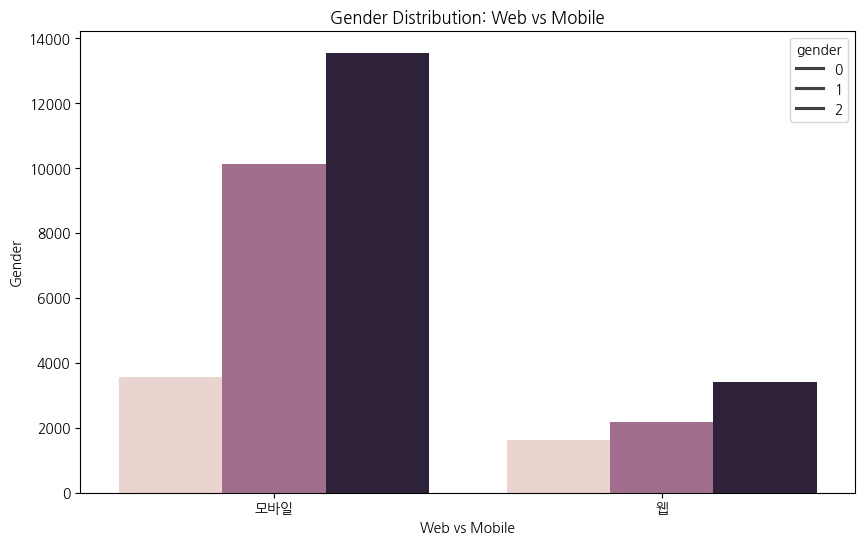

In [40]:
# 성별 웹 vs 모바일

# 성별 및 예매/취소방식명(관리시스템)별 빈도 계산
gender_distribution = df_play.groupby(['예매/취소방식명(관리시스템)', '성별']).size().reset_index(name='count')

# 시각화: 웹 vs 모바일 성별 분포 바 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='예매/취소방식명(관리시스템)', y='count', hue='성별', data=gender_distribution)
plt.title('Gender Distribution: Web vs Mobile')
plt.xlabel('Web vs Mobile')
plt.ylabel('Gender')
plt.legend(title='gender', labels=['0','1', '2'])  # 성별에 맞는 레이블 설정
plt.show()

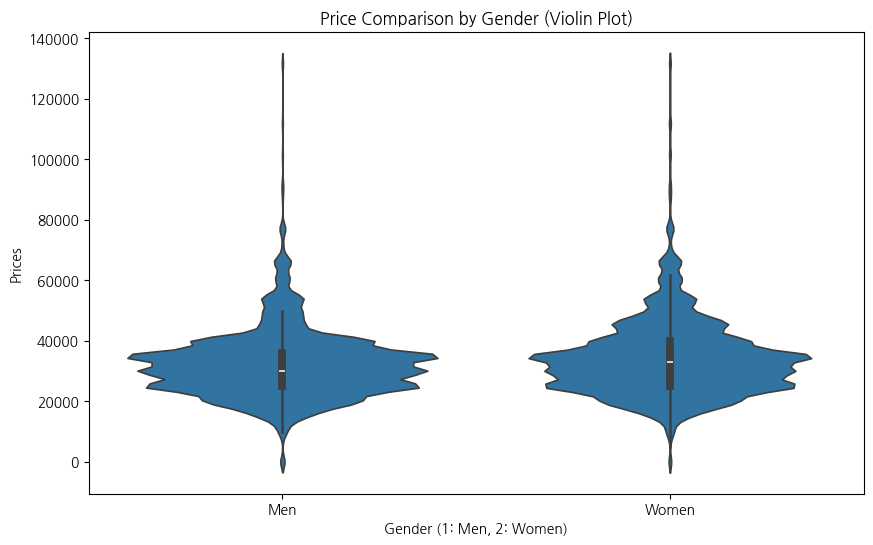

In [41]:
# 성별 별 예매금액의 차이

# 1. 성별 값이 0인 데이터를 제거 (0은 결측치로 간주)
df_filtered = df_play[df_play['성별'] != 0]

plt.figure(figsize=(10, 6))
sns.violinplot(x='성별', y='예매/취소금액', data=df_filtered)
plt.title('Price Comparison by Gender (Violin Plot)')
plt.xlabel('Gender (1: Men, 2: Women)')
plt.ylabel('Prices')
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'])  # 성별 레이블 설정
plt.show()

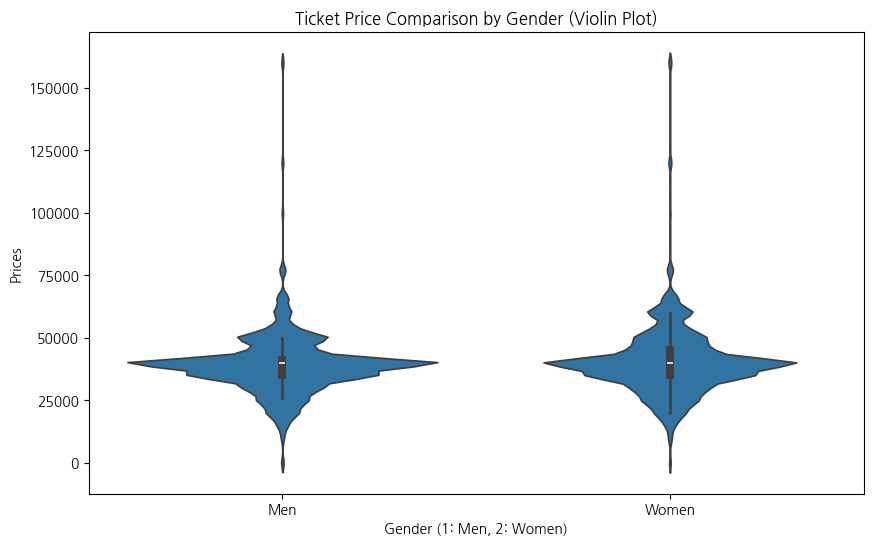

In [42]:
# 성별 별 장당금액의 차이
# 1. 성별 값이 0인 데이터를 제거 (0은 결측치로 간주)
df_filtered = df_play[df_play['성별'] != 0]

plt.figure(figsize=(10, 6))
sns.violinplot(x='성별', y='장당금액', data=df_filtered)
plt.title('Ticket Price Comparison by Gender (Violin Plot)')
plt.xlabel('Gender (1: Men, 2: Women)')
plt.ylabel('Prices')
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'])  # 성별 레이블 설정
plt.show()

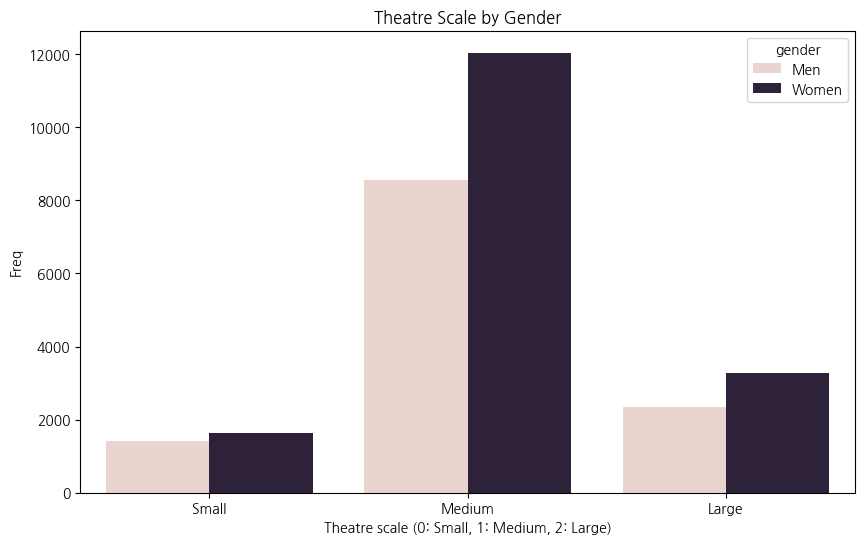

In [43]:
# 성별 별 극장 규모의 차이

df_filtered = df_play[df_play['성별'] != 0]

# 2. 성별별 극장 규모 분포를 시각화 (countplot 사용)
plt.figure(figsize=(10, 6))
sns.countplot(x='극장규모', hue='성별', data=df_filtered)
plt.title('Theatre Scale by Gender')
plt.xlabel('Theatre scale (0: Small, 1: Medium, 2: Large)')
plt.ylabel('Freq')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.legend(title='gender', labels=['Men', 'Women'])
plt.show()

중극장 이용이 최다.

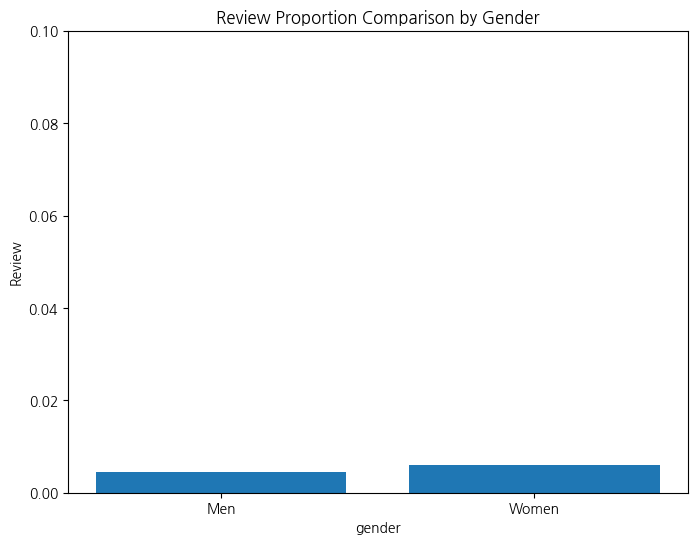

In [44]:
# 성별 별 재관람율의 차이
# 1. 성별 값이 0인 데이터를 제거 (0은 결측치로 간주)
df_filtered = df_play[df_play['성별'] != 0]

# 2. 성별별 재관람율 계산
total_counts_by_gender = df_filtered.groupby('성별')['재관람'].count().reset_index(name='총예매수')
revisit_counts_by_gender = df_filtered.groupby('성별')['재관람'].sum().reset_index(name='재관람수')

# 3. 재관람율 계산 (재관람수 / 총예매수)
revisit_ratio_by_gender = pd.merge(revisit_counts_by_gender, total_counts_by_gender, on='성별')
revisit_ratio_by_gender['재관람율'] = revisit_ratio_by_gender['재관람수'] / revisit_ratio_by_gender['총예매수']

# 4. 바 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(revisit_ratio_by_gender['성별'].map({1: 'Men', 2: 'Women'}), revisit_ratio_by_gender['재관람율'])
plt.title('Review Proportion Comparison by Gender')
plt.xlabel('gender')
plt.ylabel('Review')
plt.ylim(0, 0.1)  # 비율이므로 y축 범위를 0에서 1로 설정

# 그래프 표시
plt.show()

### 연령

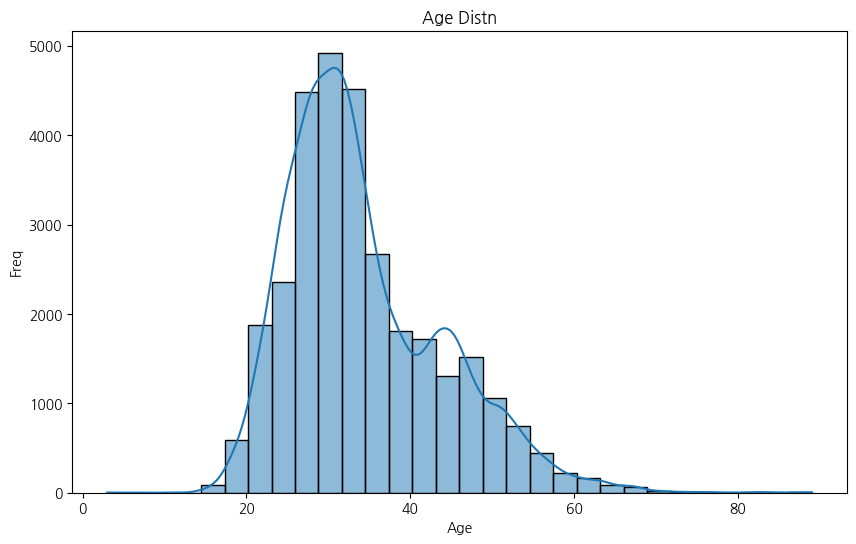

In [45]:
# 1. 연령이 (0, 100) 사이는 이상치로 처리하고 제거
df_filtered = df_play[(df_play['연령'] >= 0) & (df_play['연령'] < 100)]

# 2. 연령 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['연령'], bins=30, kde=True)
plt.title('Age Distn')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

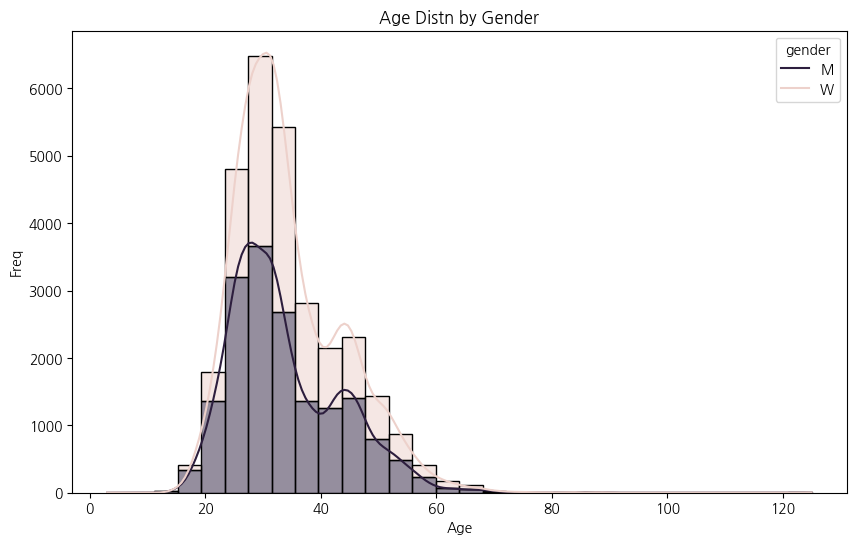

In [46]:
# 성별 별 연령분포
df_filtered = df_play[df_play['성별'] != 0]

# 2. 연령 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='연령', hue='성별', bins=30, kde=True, multiple='stack')
plt.title('Age Distn by Gender')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.legend(title='gender', labels=['M', 'W'])
plt.show()


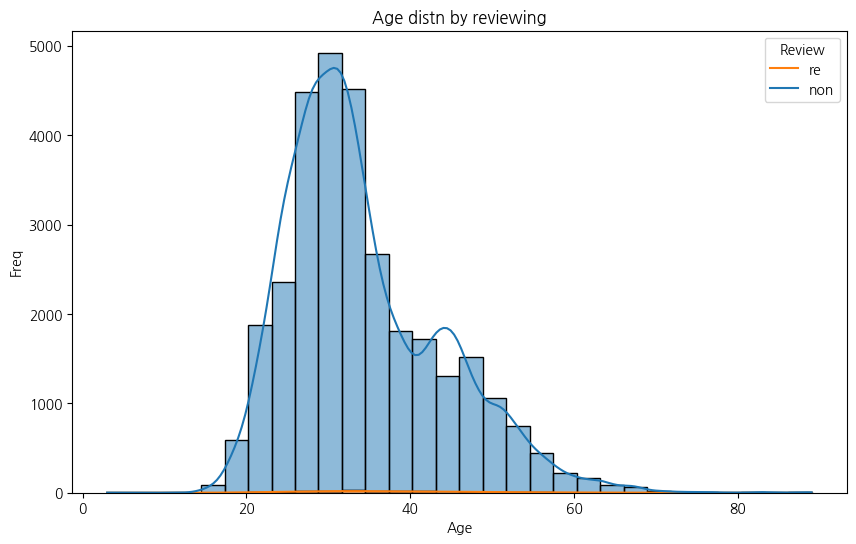

In [47]:
# 재관람 여부 별 연령 분포의 차이
df_filtered= df_play[(df_play['연령'] >= 0) & (df_play['연령'] < 100)]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='연령', hue='재관람', bins=30, kde=True, multiple='stack')
plt.title('Age distn by reviewing')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.legend(title='Review', labels=['re', 'non'])
plt.show()

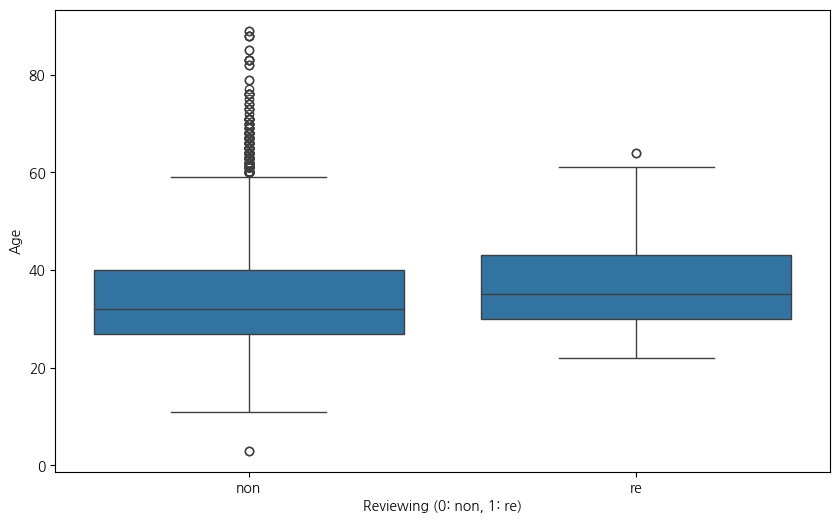

In [48]:
# 1. 재관람 여부 별 연령 분포 시각화 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='재관람', y='연령', data=df_filtered)
plt.xlabel('Reviewing (0: non, 1: re)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['non', 're'])
plt.show()

재관람 관객의 연령이 조금 더 높다.

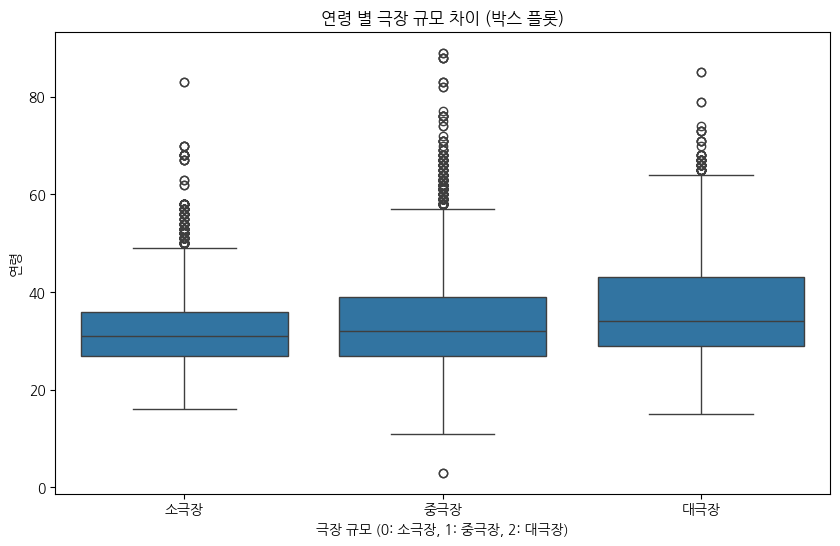

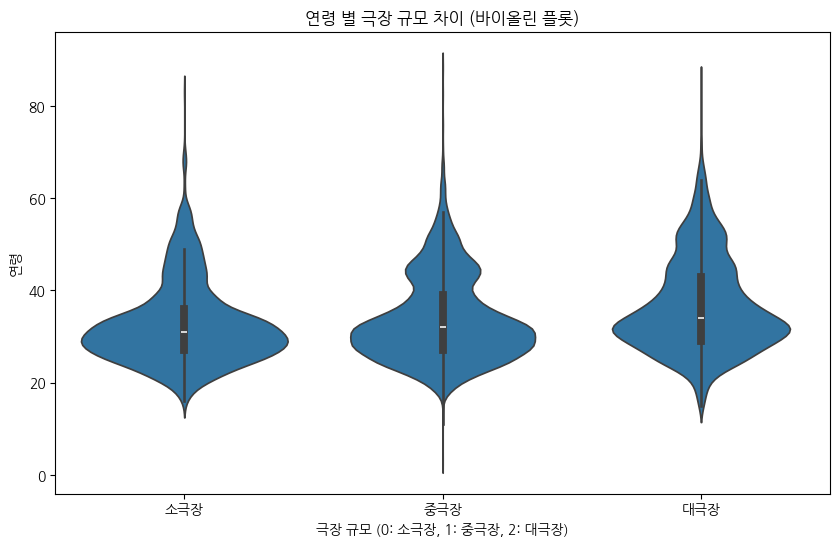

In [49]:
# 연령 별 극장 규모 차이

# 1. 연령 별 극장 규모 시각화 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='극장규모', y='연령', data=df_filtered)
plt.title('연령 별 극장 규모 차이 (박스 플롯)')
plt.xlabel('극장 규모 (0: 소극장, 1: 중극장, 2: 대극장)')
plt.ylabel('연령')
plt.xticks(ticks=[0, 1, 2], labels=['소극장', '중극장', '대극장'])
plt.show()

# 2. 연령 별 극장 규모 시각화 (바이올린 플롯)
plt.figure(figsize=(10, 6))
sns.violinplot(x='극장규모', y='연령', data=df_filtered)
plt.title('연령 별 극장 규모 차이 (바이올린 플롯)')
plt.xlabel('극장 규모 (0: 소극장, 1: 중극장, 2: 대극장)')
plt.ylabel('연령')
plt.xticks(ticks=[0, 1, 2], labels=['소극장', '중극장', '대극장'])
plt.show()

별 차이 없음

### 공연지역명

In [50]:
df_play['공연지역명'].value_counts()

,count
공연지역명,
서울,21735
경상도,5240
전라도,3288
충청도,3038
경기도,998
제주도,138
강원도,43


In [51]:
# 공연지역명 별 극장 규모 조회
df_play.groupby('공연지역명')['극장규모'].value_counts()

공연지역명  극장규모
강원도    0          43
경기도    2         663
       1         321
       0          14
경상도    1        3716
       2        1126
       0         398
서울     1       17240
       2        2272
       0        2223
전라도    1        1923
       2        1351
       0          14
제주도    0         138
충청도    1        1238
       2        1112
       0         688
Name: count, dtype: int64

In [52]:
# 공연 지역명 별 장당 가격 비교
df_play.groupby('공연지역명')['장당금액'].mean()

,장당금액
공연지역명,
강원도,15930.232558
경기도,31519.038076
경상도,37214.599237
서울,40534.499655
전라도,36652.068127
제주도,69724.637681
충청도,37188.775510


제주도의 장당 금액이 이상하게 높은데, 제주도의 장당금액 분포를 살펴보았다.

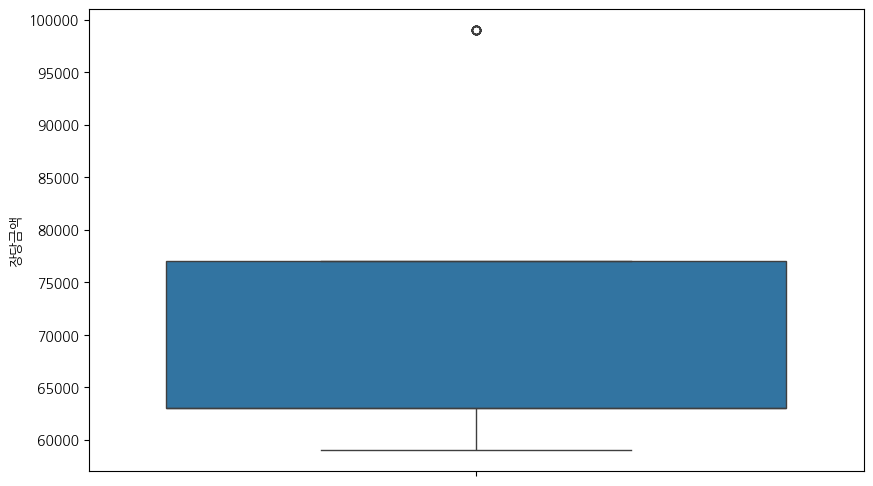

In [53]:
# 제주도 장당금액 분포
df_jeju=df_play[df_play['공연지역명']=='제주도']
plt.figure(figsize=(10, 6))
sns.boxplot(y='장당금액', data=df_jeju)
plt.show()

In [54]:
# 공연 지역 별 재관람율 비교
df_play.groupby('공연지역명')['재관람'].mean()

,재관람
공연지역명,
강원도,0.000000
경기도,0.014028
경상도,0.001908
서울,0.006211
전라도,0.000000
제주도,0.000000
충청도,0.000658


In [55]:
# 공연 지역 별 재관람 비교
df_play.groupby('공연지역명')['재관람'].sum()

,재관람
공연지역명,
강원도,0
경기도,14
경상도,10
서울,135
전라도,0
제주도,0
충청도,2


### 내한공연 여부

In [56]:
df_play['내한공연 여부'].value_counts()

,count
내한공연 여부,
N,34480


### 오픈런 여부

In [57]:
df_play['오픈런 여부'].value_counts()

,count
오픈런 여부,
N,18659
Y,15821


In [58]:
# 오픈런 여부 별 장당 금액 비교
df_play.groupby('오픈런 여부')['장당금액'].mean()

,장당금액
오픈런 여부,
N,38889.836004
Y,39544.333481


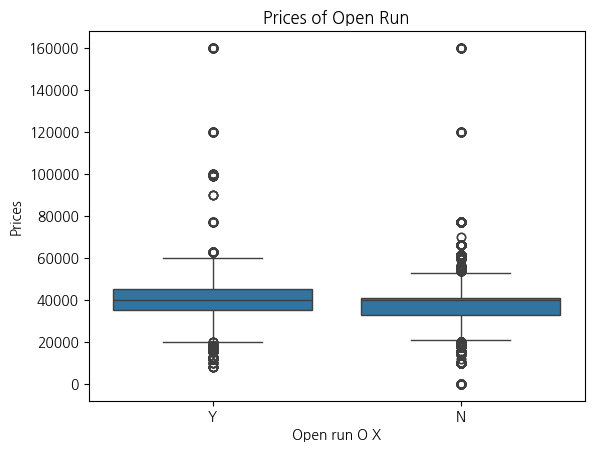

In [59]:
# 오픈런 여부 별 박스플롯
sns.boxplot(x='오픈런 여부', y='장당금액', data=df_play)
plt.title('Prices of Open Run')
plt.xlabel('Open run O X')
plt.ylabel('Prices')
plt.show()

In [60]:
# 오픈런 여부 별 극장규모 비교
df_play.groupby('오픈런 여부')['극장규모'].value_counts()

오픈런 여부  극장규모
N       1       10616
        2        6524
        0        1519
Y       1       13822
        0        1999
Name: count, dtype: int64

In [61]:
# 오픈런 여부 별 재관람율 비교
df_play.groupby('오픈런 여부')['재관람'].mean()

,재관람
오픈런 여부,
N,0.007771
Y,0.001011


In [62]:
df_play.groupby('오픈런 여부')['재관람'].sum()

,재관람
오픈런 여부,
N,145
Y,16


### 조기 예매

In [63]:
# 조기예매 별 예매 금액 비교
df_play.groupby('조기예매')['예매/취소금액'].mean()

,예매/취소금액
조기예매,
0,32471.289154
1,33874.335484


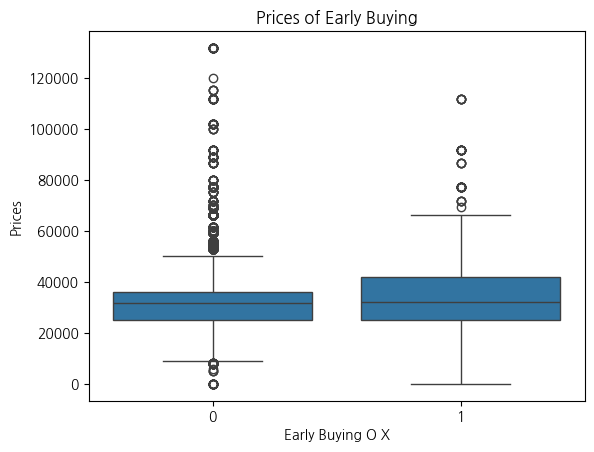

In [64]:
# 조기예매 별 예매 금액 박스플롯
sns.boxplot(x='조기예매', y='예매/취소금액', data=df_play)
plt.title('Prices of Early Buying')
plt.xlabel('Early Buying O X')
plt.ylabel('Prices')
plt.show()

In [65]:
# 조기예매 별 성별 분포 비교
df_play.groupby('조기예매')['성별'].value_counts()

조기예매  성별
0     2     11946
      1      9218
      0      4791
1     2      5014
      1      3091
      0       420
Name: count, dtype: int64

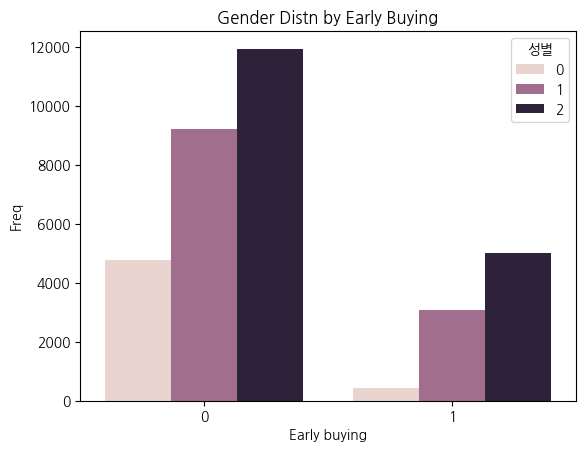

In [66]:
# 빈도수 계산
df_counts = df_play.groupby(['조기예매', '성별']).size().reset_index(name='count')

# 막대 그래프 그리기
sns.barplot(x='조기예매', y='count', hue='성별', data=df_counts)
plt.title('Gender Distn by Early Buying')
plt.xlabel('Early buying')
plt.ylabel('Freq')
plt.show()

In [67]:
# 조기 예매 별 예매처 비교
df_play.groupby('조기예매')['예매/취소방식명(관리시스템)'].value_counts()

조기예매  예매/취소방식명(관리시스템)
0     모바일                20813
      웹                   5142
1     모바일                 6429
      웹                   2096
Name: count, dtype: int64

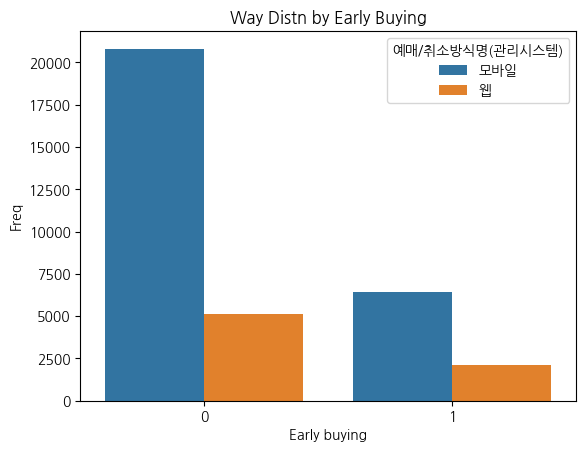

In [68]:
# 빈도수 계산
df_counts = df_play.groupby(['조기예매', '예매/취소방식명(관리시스템)']).size().reset_index(name='count')

# 막대 그래프 그리기
sns.barplot(x='조기예매', y='count', hue='예매/취소방식명(관리시스템)', data=df_counts)
plt.title('Way Distn by Early Buying')
plt.xlabel('Early buying')
plt.ylabel('Freq')
plt.show()

### 좌석 등급

In [69]:
df_play['좌석등급'].value_counts()

,count
좌석등급,
전석(40000),11704
전석(35000),8046
전석(50000),3443
전석(60000),1994
전석(30000),1617
전석(45000),1337
"R석(66000), S석(55000)",1132
전석(66000),633
"(1층)R석(44000), (2층)S석(34000)",580


### 스타배우 영향

스타배우 출연진이 영향이 있는지를 판별.

객석 x 장당 가격으로 파워 살펴보기

스타배우 칼럼 : 1이면 스타배우 극, 0이면 아님

In [70]:
lst=['최정원', '고준희', '신성록', '차승원', '진선규', '엄기준', '양지원', '나문희', '봉태규', '김선영', '김수미', '고두심', '염혜란',
     '문소리', '박정원', '박은석', '박해수', '박소담', '정성일', '지현준', '이순재', '신구', '홍승안', '정휘', '전성우', '박정복', '전동석',
     '강홍석', '조승우', '옥주현', '정선아', '민경아', '김선영', '최재림', '전미도', '카이', '김준수', '홍강호', '박효신', '박강현', '정성화', '규현',
     '박은태', '박성훈', '조정석', '김승우', '지창욱', '홍광호', '신영숙', '차지연', '지창욱', '한지상', '마이클리', '김소현', '박건형', '윤공주', '바다', '서범석', '아이비']

# 스타배우 칼럼 추가
# 스타배우 칼럼 추가
# 스타배우 칼럼 추가
df_play['스타배우'] = df_play['출연진내용'].apply(
    lambda x: 1 if isinstance(x, str) and any(actor in x.split(', ') for actor in lst) else 0
)

df_play['스타배우'].value_counts()

<ipython-input-70-366bdc049cd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play['스타배우'] = df_play['출연진내용'].apply(


,count
스타배우,
0,33121
1,1359


<ipython-input-71-fe00685e0a77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play['파워'] = df_play['장당금액'] * df_play['좌석수']
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


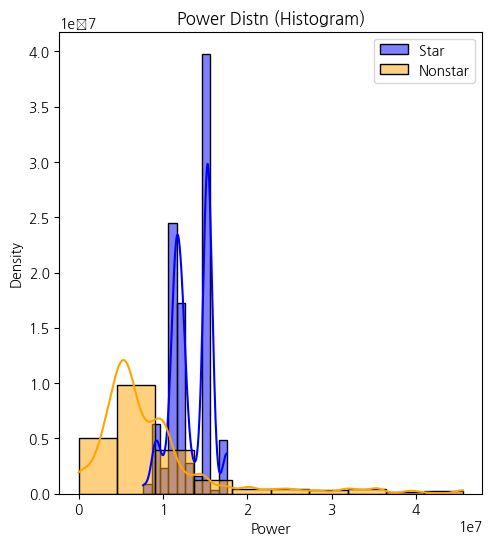

In [71]:
# 파워칼럼
# 파워 칼럼 계산: 장당금액 * 좌석 수
df_play['파워'] = df_play['장당금액'] * df_play['좌석수']

# 스타배우 사용 여부에 따라 데이터 나누기
power_with_stars = df_play[df_play['스타배우'] == 1]['파워']
power_without_stars = df_play[df_play['스타배우'] == 0]['파워']

# 시각화
plt.figure(figsize=(12, 6))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(power_with_stars, bins=10, color='blue', kde=True, label='Star', stat='density')
sns.histplot(power_without_stars, bins=10, color='orange', kde=True, label='Nonstar', stat='density')
plt.title('Power Distn (Histogram)')
plt.xlabel('Power')
plt.ylabel('Density')
plt.legend()
plt.show()

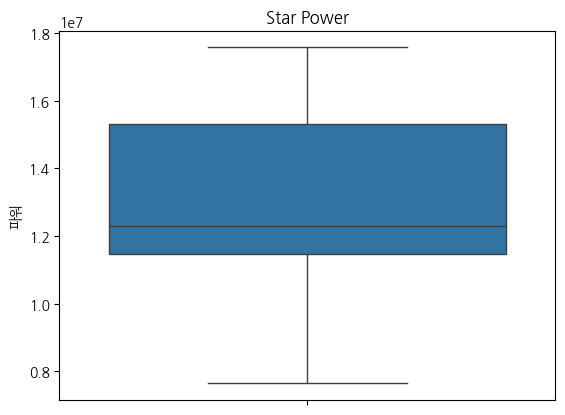

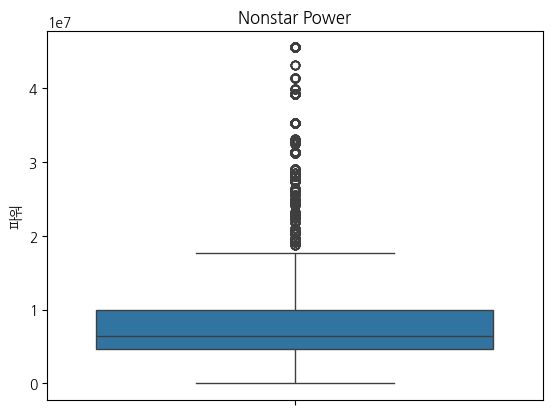

In [72]:
power_with_stars = df_play[df_play['스타배우'] == 1]['파워']
power_without_stars = df_play[df_play['스타배우'] == 0]['파워']

sns.boxplot(power_with_stars)
plt.title('Star Power')
plt.show()
sns.boxplot(power_without_stars)
plt.title('Nonstar Power')
plt.show()

# EDA_뮤지컬

### 공연코드

In [73]:
df_musical['공연코드'].value_counts()

,count
공연코드,
PF452530,4861
PF447753,4801
PF449225,3856
PF452759,3577
PF449787,3502
...,...
PF422856,10
PF441107,8
PF454605,8


### 공연일시에 따른 가격

<ipython-input-74-55ed5fc0e369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_musical['공연일시']=pd.to_datetime(df_musical['공연일시'])


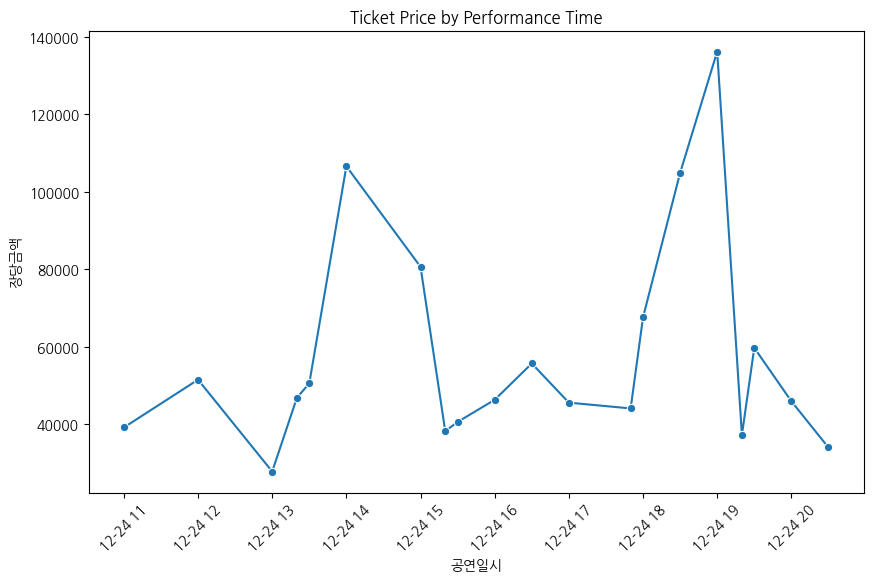

In [74]:
df_musical['공연일시']=pd.to_datetime(df_musical['공연일시'])

# 시각화: 공연일시별 평균 장당금액 변화
mean_price = df_musical.groupby('공연일시')['장당금액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='공연일시', y='장당금액', data=mean_price, marker='o')
plt.title('Ticket Price by Performance Time')
plt.xticks(rotation=45)
plt.show()

### 예매/취소매수

In [75]:
df_musical['예매/취소매수'].value_counts()

,count
예매/취소매수,
1,60236


### 예매/취소금액

In [76]:
df_musical['예매/취소금액'].value_counts()

,count
예매/취소금액,
170000,4197
140000,3836
121000,2891
160000,2485
150000,2475
...,...
28130,1
36580,1
109000,1


In [77]:
df_musical['예매/취소금액'].value_counts().sort_index(ascending=False)

,count
예매/취소금액,
199950,38
190000,1161
180500,582
180000,1196
173800,12
...,...
9610,30
9000,4
5000,45


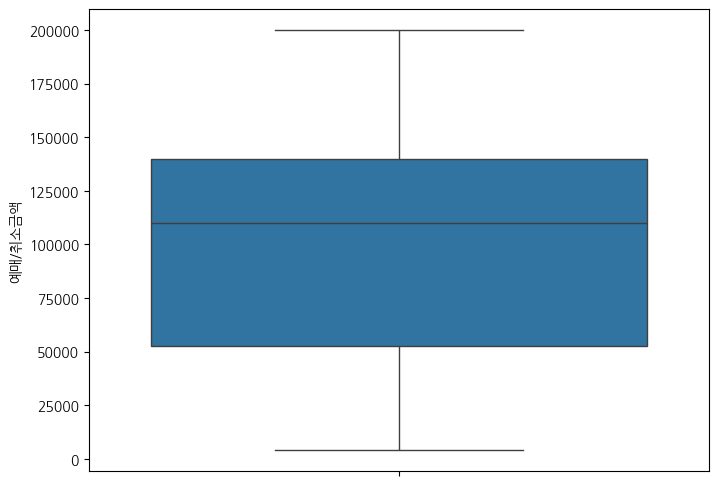

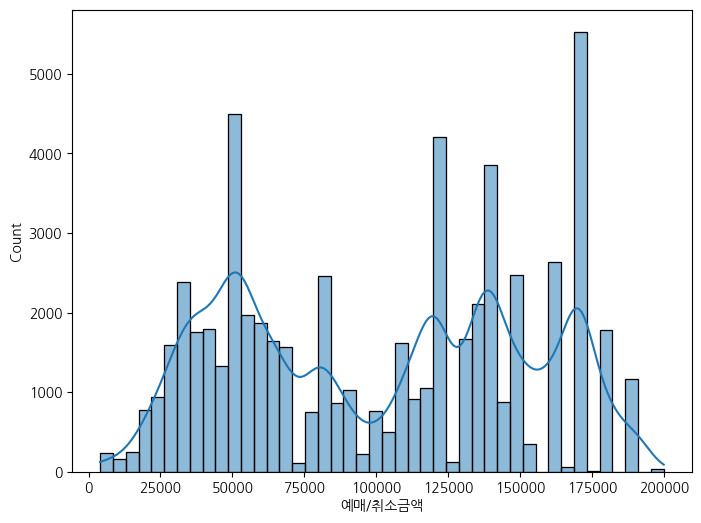

In [78]:
# 예매취소금액 분포
# 예매취소금액이 0인 것은 결측치로 처리하고 제거

df_musical_price=df_musical[df_musical['예매/취소금액']!=0]

# 시각화: 금액 분포 박스 플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='예매/취소금액', data=df_musical_price, showfliers=False)
plt.show()

# 시각화: 금액 분포 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(df_musical_price['예매/취소금액'], kde=True)
plt.show()

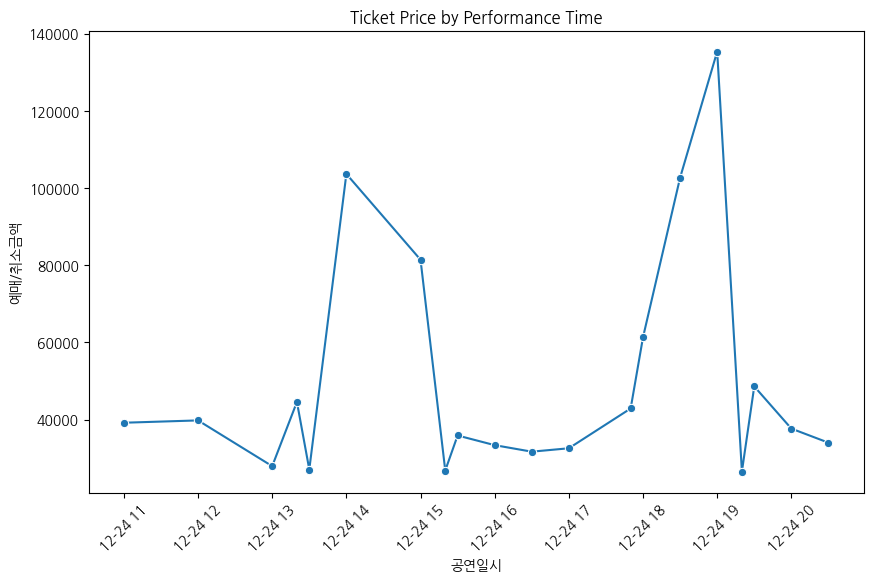

In [79]:
# 시각화: 공연일시별 평균 예매금액 변화
mean_price = df_musical_price.groupby('공연일시')['예매/취소금액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='공연일시', y='예매/취소금액', data=mean_price, marker='o')
plt.title('Ticket Price by Performance Time')
plt.xticks(rotation=45)
plt.show()

In [80]:
df_musical.groupby('재관람')['예매/취소금액'].describe()

,count,mean,std,min,25%,50%,75%,max
재관람,,,,,,,,
0,59955.0,100745.241898,51002.333939,0.0,52800.0,110000.0,140000.0,199950.0
1,281.0,104563.701068,48605.742781,15000.0,63000.0,96800.0,144000.0,171000.0


In [81]:
df_musical[df_musical['재관람']==1].shape

(281, 27)

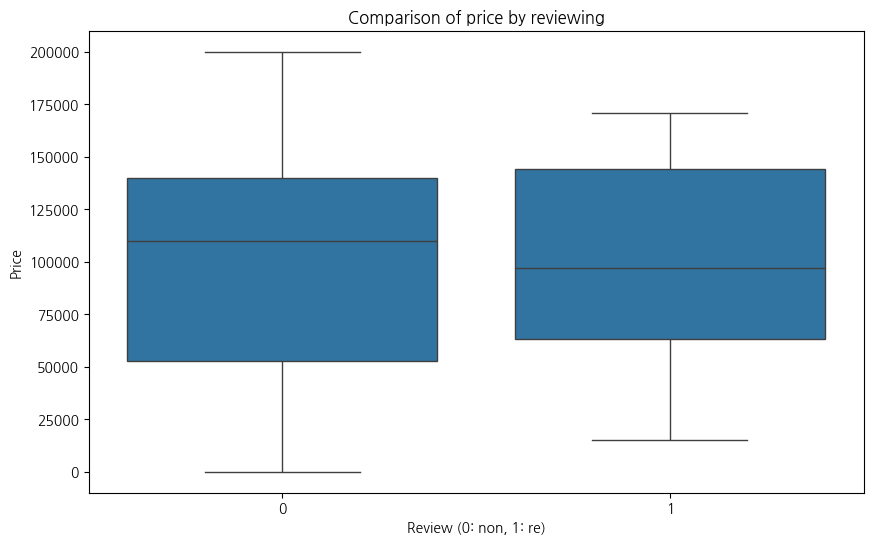

In [82]:
# 재관람과 비재관람 데이터의 예매/취소 금액 차이

# 박스 플롯 시각화: 재관람 여부에 따른 예매/취소금액 비교
plt.figure(figsize=(10, 6))
sns.boxplot(x='재관람', y='예매/취소금액', data=df_musical, showfliers=True)
plt.title('Comparison of price by reviewing')
plt.xlabel('Review (0: non, 1: re)')
plt.ylabel('Price')
plt.show()

### 예매/취소방식명

In [83]:
df_musical['예매/취소방식명(관리시스템)'].value_counts()

,count
예매/취소방식명(관리시스템),
모바일,37329
웹,22907


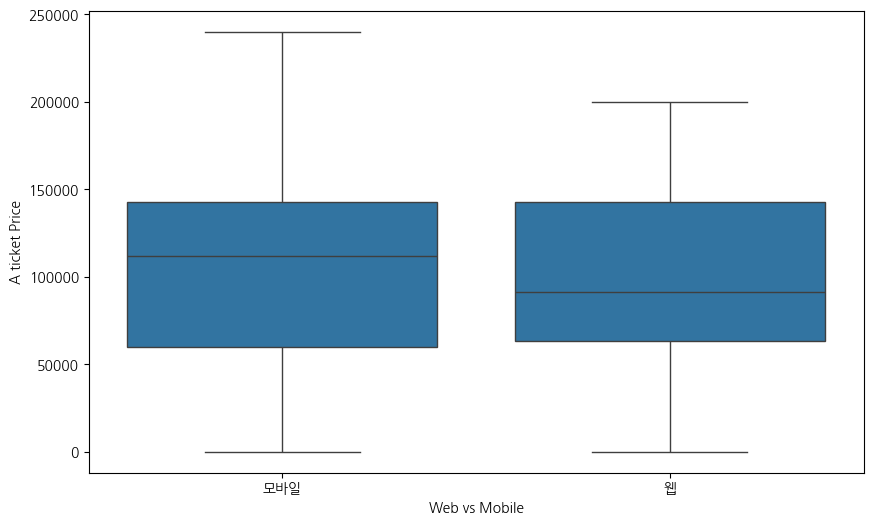

In [84]:
# 장당금액 웹 vs 모바일
plt.figure(figsize=(10, 6))
sns.boxplot(x='예매/취소방식명(관리시스템)', y='장당금액', data=df_musical)
plt.xlabel('Web vs Mobile')
plt.ylabel('A ticket Price')
plt.show()

모바일로 결제하였을 때의 가격이 조금 더 높게 형성되는 경향이 있다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


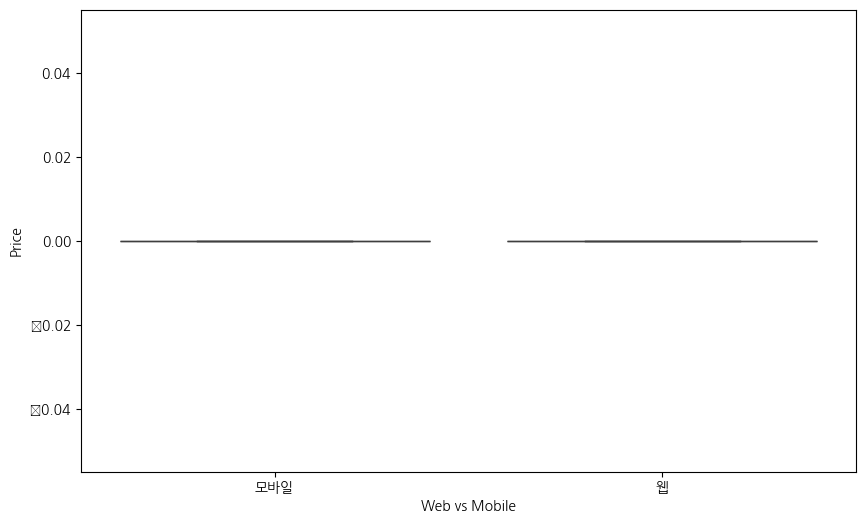

In [85]:
# 할인금액 웹 vs 모바일
# 시각화: 웹 vs 모바일 장당금액 비교 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='예매/취소방식명(관리시스템)', y='할인금액', data=df_musical, showfliers=False)
plt.xlabel('Web vs Mobile')
plt.ylabel('Price')
plt.show()

둘 다 비슷하게 0

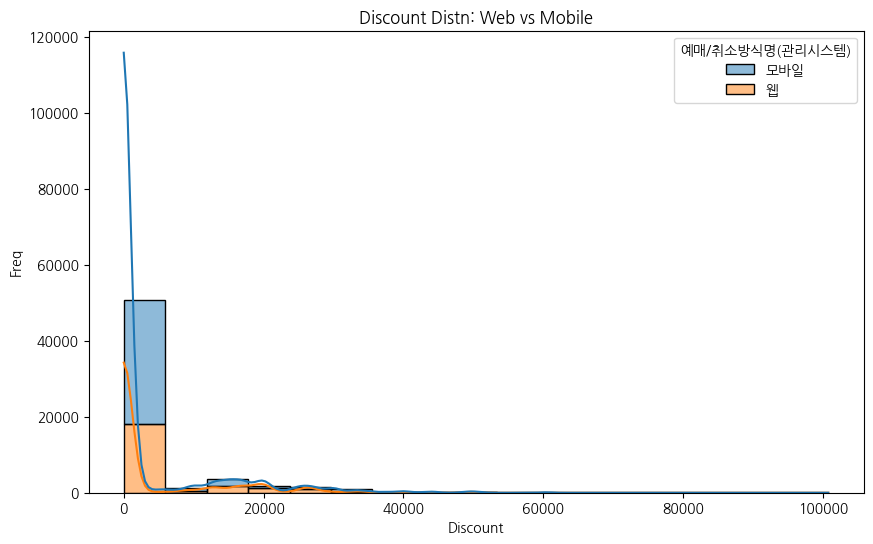

In [86]:
# 할인금액의 분포를 히스토그램으로 시각화 (웹 vs 모바일)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_musical, x='할인금액', hue='예매/취소방식명(관리시스템)', kde=True, multiple='stack')
plt.title('Discount Distn: Web vs Mobile')
plt.xlabel('Discount')
plt.ylabel('Freq')
plt.show()


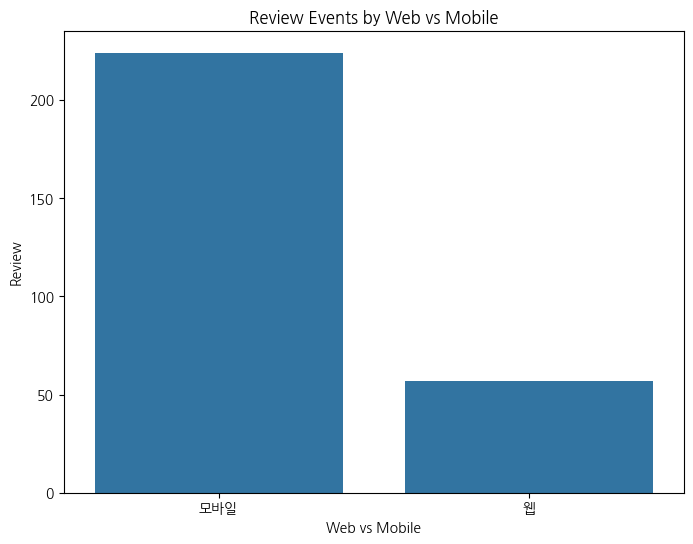

In [87]:
# 구매처 별 재관람 건수 시각화
revisit_ratio = df_musical.groupby('예매/취소방식명(관리시스템)')['재관람'].sum().reset_index()

# 바 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='예매/취소방식명(관리시스템)', y='재관람', data=revisit_ratio)
plt.title('Review Events by Web vs Mobile')
plt.xlabel('Web vs Mobile')
plt.ylabel('Review')
plt.show()

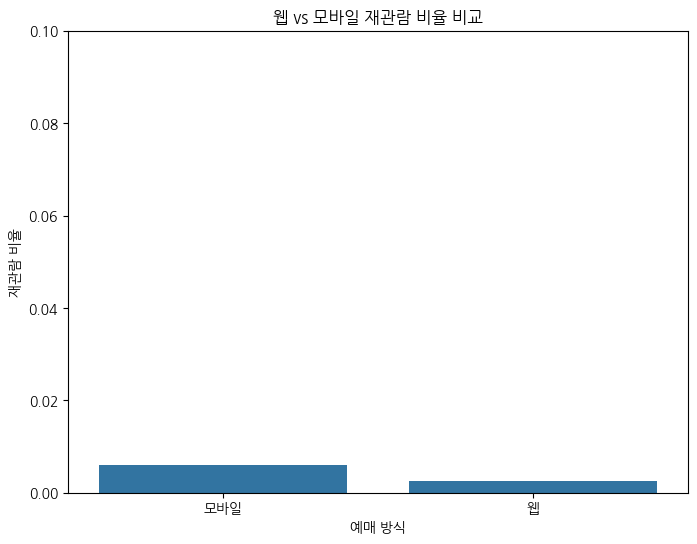

In [88]:
# 예매방식명별로 재관람 비율 계산
# 재관람의 비율은 '재관람' 값이 1인 경우의 평균으로 계산할 수 있습니다.
revisit_ratio = df_musical.groupby('예매/취소방식명(관리시스템)')['재관람'].mean().reset_index()

# 바 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='예매/취소방식명(관리시스템)', y='재관람', data=revisit_ratio)
plt.title('웹 vs 모바일 재관람 비율 비교')
plt.xlabel('예매 방식')
plt.ylabel('재관람 비율')
plt.ylim(0, 0.1)
plt.show()

재관람 건수와 비율 모두 모바일에서 높다.

### 성별

1: 남, 2: 여, 0: 알수없음

In [89]:
df_musical['성별'].value_counts()

,count
성별,
2,36704
1,16531
0,7001


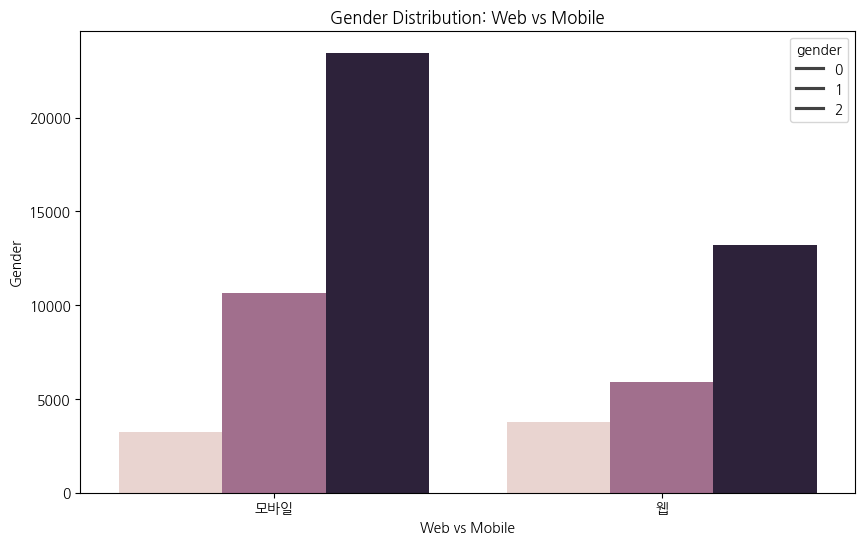

In [90]:
# 성별 웹 vs 모바일

# 성별 및 예매/취소방식명(관리시스템)별 빈도 계산
gender_distribution = df_musical.groupby(['예매/취소방식명(관리시스템)', '성별']).size().reset_index(name='count')

# 시각화: 웹 vs 모바일 성별 분포 바 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='예매/취소방식명(관리시스템)', y='count', hue='성별', data=gender_distribution)
plt.title('Gender Distribution: Web vs Mobile')
plt.xlabel('Web vs Mobile')
plt.ylabel('Gender')
plt.legend(title='gender', labels=['0','1', '2'])  # 성별에 맞는 레이블 설정
plt.show()

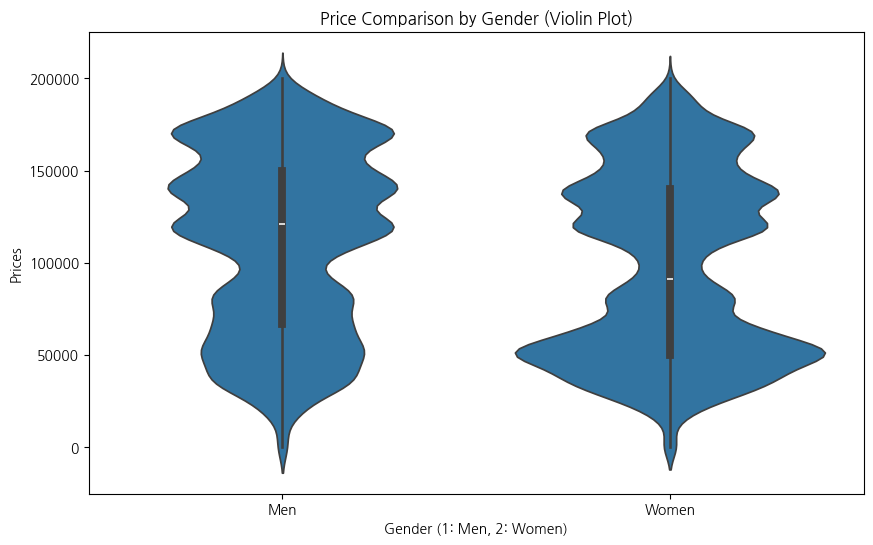

In [91]:
# 성별 별 예매금액의 차이

# 1. 성별 값이 0인 데이터를 제거 (0은 결측치로 간주)
df_filtered = df_musical[df_musical['성별'] != 0]

plt.figure(figsize=(10, 6))
sns.violinplot(x='성별', y='예매/취소금액', data=df_filtered)
plt.title('Price Comparison by Gender (Violin Plot)')
plt.xlabel('Gender (1: Men, 2: Women)')
plt.ylabel('Prices')
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'])  # 성별 레이블 설정
plt.show()

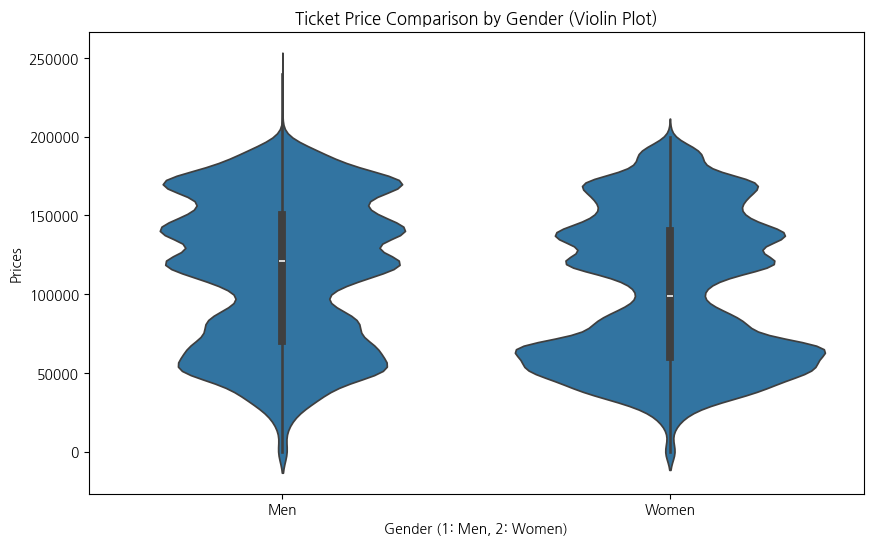

In [92]:
# 성별 별 장당금액의 차이
# 1. 성별 값이 0인 데이터를 제거 (0은 결측치로 간주)
df_filtered = df_musical[df_musical['성별'] != 0]

plt.figure(figsize=(10, 6))
sns.violinplot(x='성별', y='장당금액', data=df_filtered)
plt.title('Ticket Price Comparison by Gender (Violin Plot)')
plt.xlabel('Gender (1: Men, 2: Women)')
plt.ylabel('Prices')
plt.xticks(ticks=[0, 1], labels=['Men', 'Women'])  # 성별 레이블 설정
plt.show()

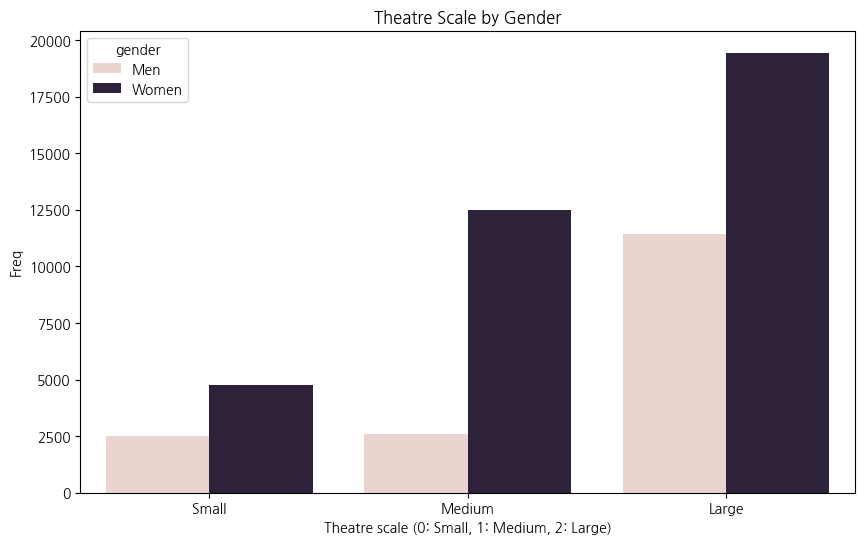

In [93]:
# 성별 별 극장 규모의 차이

df_filtered = df_musical[df_musical['성별'] != 0]

# 2. 성별별 극장 규모 분포를 시각화 (countplot 사용)
plt.figure(figsize=(10, 6))
sns.countplot(x='극장규모', hue='성별', data=df_filtered)
plt.title('Theatre Scale by Gender')
plt.xlabel('Theatre scale (0: Small, 1: Medium, 2: Large)')
plt.ylabel('Freq')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.legend(title='gender', labels=['Men', 'Women'])
plt.show()

남성의 경우 대극장 극을 더 많이 보고, 여성의 경우 중극장의 이용비율이 높다.

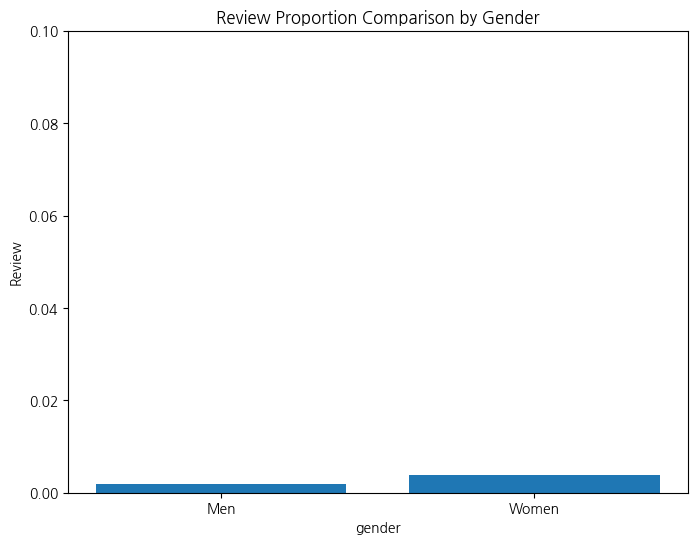

In [94]:
# 성별 별 재관람율의 차이
# 1. 성별 값이 0인 데이터를 제거 (0은 결측치로 간주)
df_filtered = df_musical[df_musical['성별'] != 0]

# 2. 성별별 재관람율 계산
total_counts_by_gender = df_filtered.groupby('성별')['재관람'].count().reset_index(name='총예매수')
revisit_counts_by_gender = df_filtered.groupby('성별')['재관람'].sum().reset_index(name='재관람수')

# 3. 재관람율 계산 (재관람수 / 총예매수)
revisit_ratio_by_gender = pd.merge(revisit_counts_by_gender, total_counts_by_gender, on='성별')
revisit_ratio_by_gender['재관람율'] = revisit_ratio_by_gender['재관람수'] / revisit_ratio_by_gender['총예매수']

# 4. 바 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(revisit_ratio_by_gender['성별'].map({1: 'Men', 2: 'Women'}), revisit_ratio_by_gender['재관람율'])
plt.title('Review Proportion Comparison by Gender')
plt.xlabel('gender')
plt.ylabel('Review')
plt.ylim(0, 0.1)  # 비율이므로 y축 범위를 0에서 1로 설정

# 그래프 표시
plt.show()

여성의 재관람율이 더 높다.

### 연령

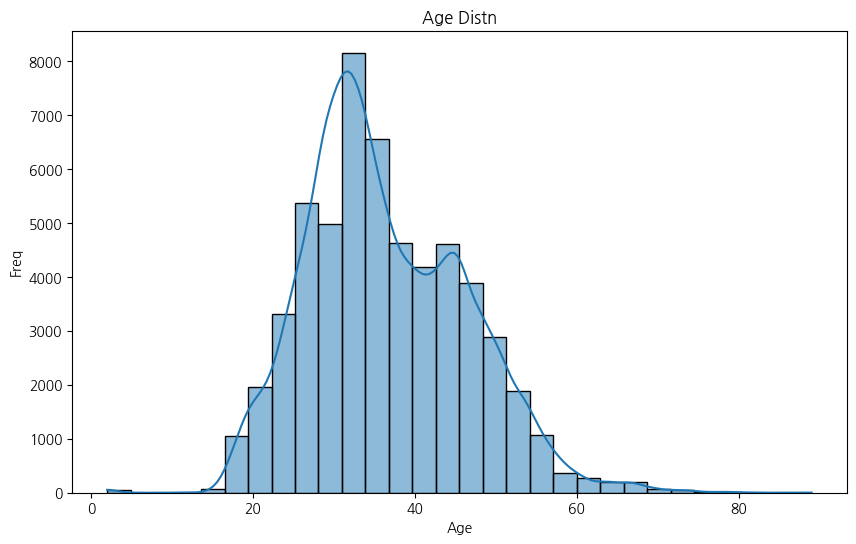

In [95]:
# 1. 연령이 (0, 100) 사이는 이상치로 처리하고 제거
df_filtered = df_musical[(df_musical['연령'] >= 0) & (df_musical['연령'] < 100)]

# 2. 연령 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['연령'], bins=30, kde=True)
plt.title('Age Distn')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

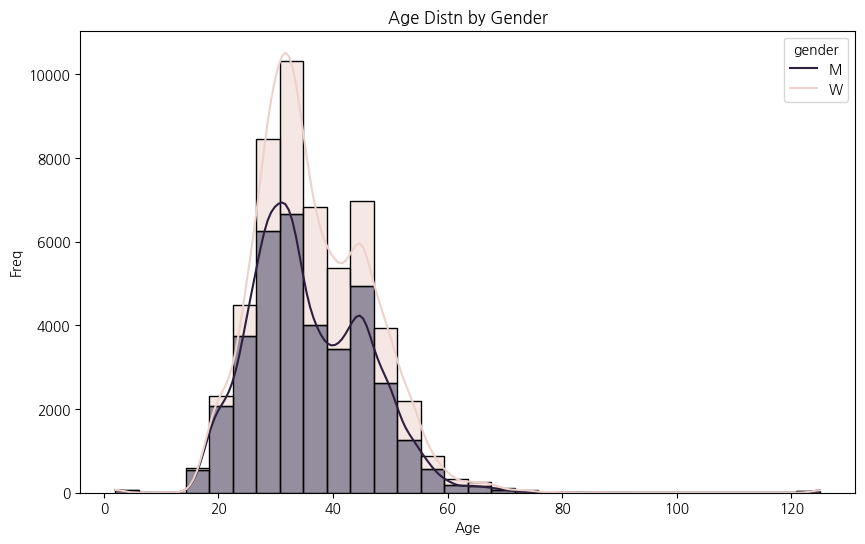

In [96]:
# 성별 별 연령분포
df_filtered = df_musical[df_musical['성별'] != 0]

# 2. 연령 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='연령', hue='성별', bins=30, kde=True, multiple='stack')
plt.title('Age Distn by Gender')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.legend(title='gender', labels=['M', 'W'])
plt.show()

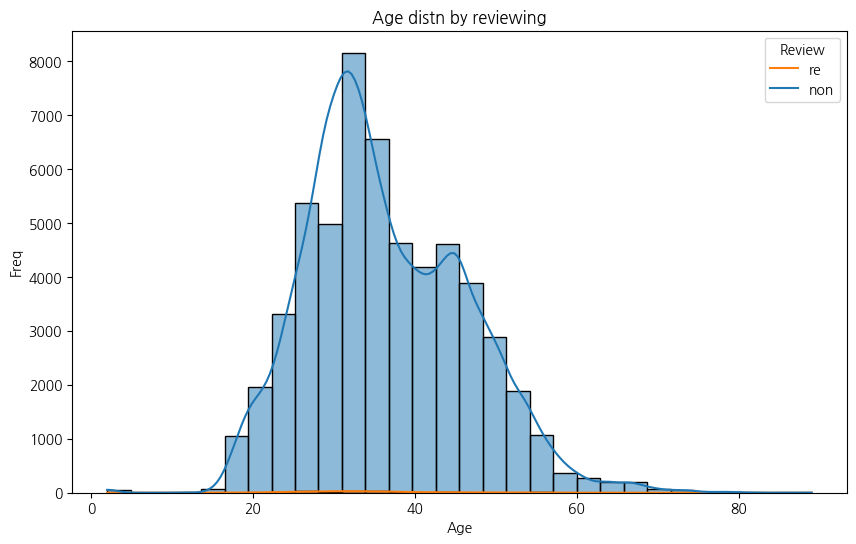

In [97]:
# 재관람 여부 별 연령 분포의 차이
df_filtered= df_musical[(df_musical['연령'] >= 0) & (df_musical['연령'] < 100)]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='연령', hue='재관람', bins=30, kde=True, multiple='stack')
plt.title('Age distn by reviewing')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.legend(title='Review', labels=['re', 'non'])
plt.show()

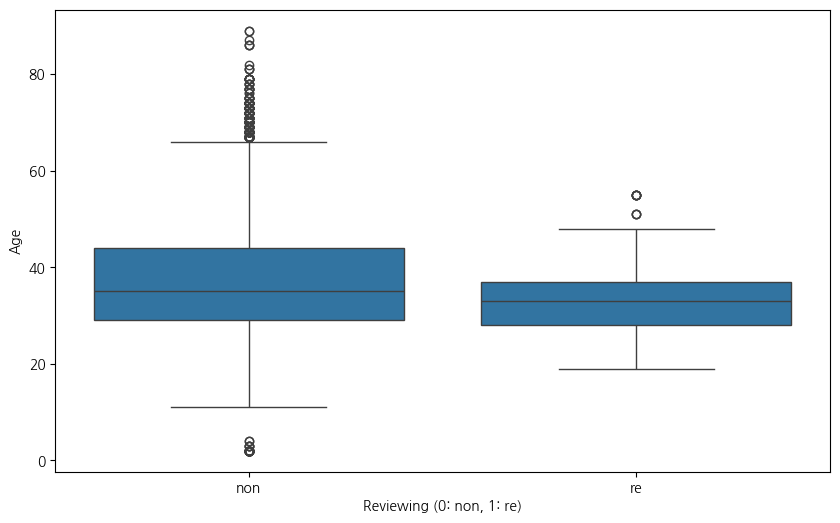

In [98]:
# 1. 재관람 여부 별 연령 분포 시각화 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='재관람', y='연령', data=df_filtered)
plt.xlabel('Reviewing (0: non, 1: re)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['non', 're'])
plt.show()

별 차이 없다

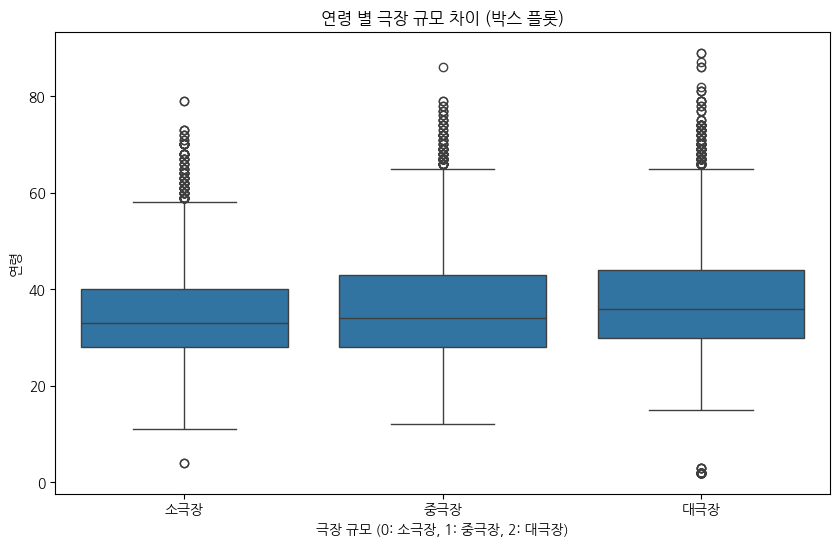

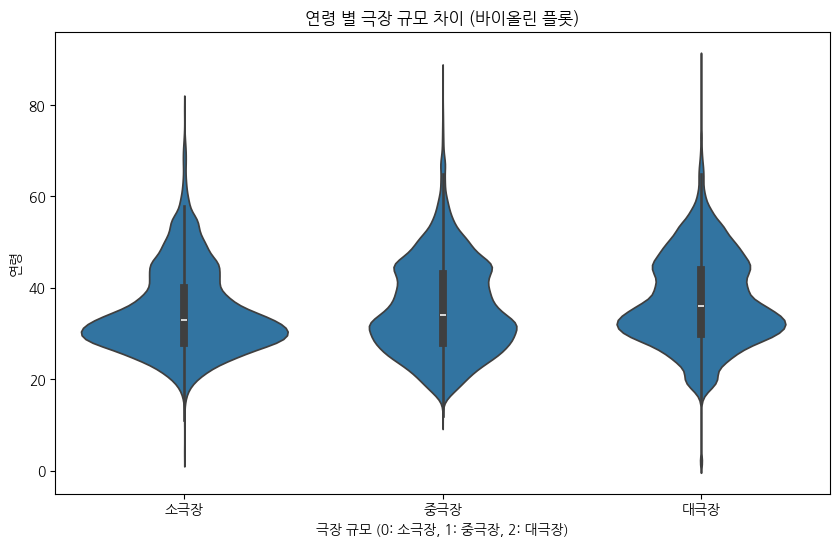

In [99]:
# 연령 별 극장 규모 차이

# 1. 연령 별 극장 규모 시각화 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='극장규모', y='연령', data=df_filtered)
plt.title('연령 별 극장 규모 차이 (박스 플롯)')
plt.xlabel('극장 규모 (0: 소극장, 1: 중극장, 2: 대극장)')
plt.ylabel('연령')
plt.xticks(ticks=[0, 1, 2], labels=['소극장', '중극장', '대극장'])
plt.show()

# 2. 연령 별 극장 규모 시각화 (바이올린 플롯)
plt.figure(figsize=(10, 6))
sns.violinplot(x='극장규모', y='연령', data=df_filtered)
plt.title('연령 별 극장 규모 차이 (바이올린 플롯)')
plt.xlabel('극장 규모 (0: 소극장, 1: 중극장, 2: 대극장)')
plt.ylabel('연령')
plt.xticks(ticks=[0, 1, 2], labels=['소극장', '중극장', '대극장'])
plt.show()

### 공연지역명

In [100]:
df_musical['공연지역명'].value_counts()

,count
공연지역명,
서울,46232
경상도,10041
경기도,1785
충청도,1358
전라도,428
제주도,222
강원도,170


In [101]:
# 공연지역명 별 극장 규모 조회
df_musical.groupby('공연지역명')['극장규모'].value_counts()

공연지역명  극장규모
강원도    0         170
경기도    1        1023
       2         744
       0          18
경상도    2        9761
       0         280
서울     2       24450
       1       14392
       0        7390
전라도    1         428
제주도    1         222
충청도    1         730
       2         547
       0          81
Name: count, dtype: int64

In [102]:
# 공연 지역명 별 장당 가격 비교
# 공연지역명 별 극장 규모 조회
df_musical.groupby('공연지역명')['장당금액'].mean()

,장당금액
공연지역명,
강원도,47235.294118
경기도,77089.355742
경상도,121547.958371
서울,104078.892326
전라도,47021.028037
제주도,56779.279279
충청도,41436.229750


In [103]:
# 공연 지역 별 재관람율 비교
df_musical.groupby('공연지역명')['재관람'].mean()

,재관람
공연지역명,
강원도,0.000000
경기도,0.000000
경상도,0.011553
서울,0.003331
전라도,0.000000
제주도,0.000000
충청도,0.008100


In [104]:
# 공연 지역 별 재관람 비교
df_musical.groupby('공연지역명')['재관람'].sum()

,재관람
공연지역명,
강원도,0
경기도,0
경상도,116
서울,154
전라도,0
제주도,0
충청도,11


### 내한공연 여부

In [105]:
df_musical['내한공연 여부'].value_counts()

,count
내한공연 여부,
N,57129
Y,3107


In [106]:
df_musical.groupby('내한공연 여부')['장당금액'].mean()

,장당금액
내한공연 여부,
N,103152.645767
Y,120330.157708


<ipython-input-107-cda8f3e1639c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='내한공연 여부', y='장당금액', data=df_musical, palette=["blue", "orange"])


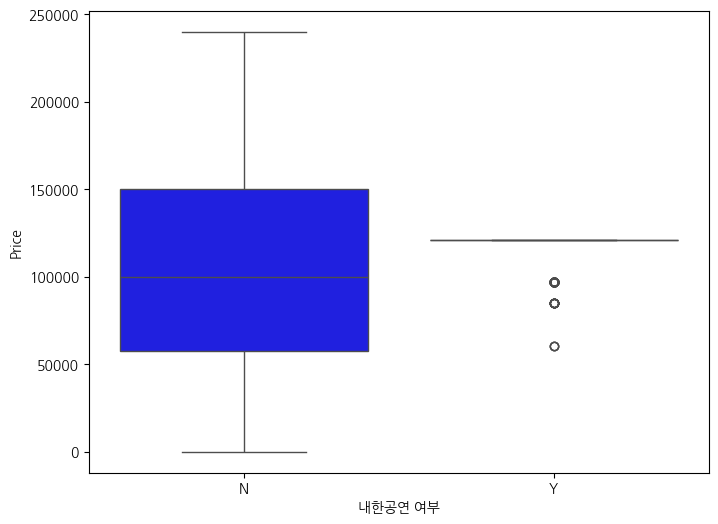

In [107]:
# 박스플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='내한공연 여부', y='장당금액', data=df_musical, palette=["blue", "orange"])
plt.ylabel('Price')
plt.show()

In [108]:
# 내한공연 별 재관람 횟수 관찰
df_musical.groupby('내한공연 여부')['재관람'].sum()

,재관람
내한공연 여부,
N,226
Y,55


In [109]:
# 내한공연 별 재관람율 관찰
df_musical.groupby('내한공연 여부')['재관람'].mean()

,재관람
내한공연 여부,
N,0.003956
Y,0.017702


### 오픈런 여부

In [110]:
df_musical['오픈런 여부'].value_counts()

,count
오픈런 여부,
N,57763
Y,2473


In [111]:
# 오픈런 여부 별 장당 금액 비교
df_musical.groupby('오픈런 여부')['장당금액'].mean()

,장당금액
오픈런 여부,
N,106436.476637
Y,48031.985443


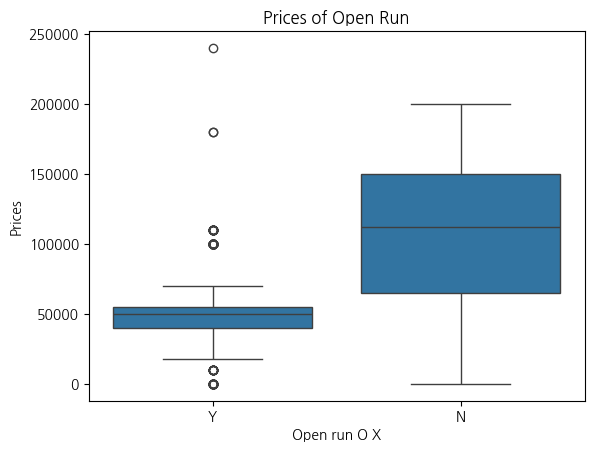

In [112]:
# 오픈런 여부 별 박스플롯
sns.boxplot(x='오픈런 여부', y='장당금액', data=df_musical)
plt.title('Prices of Open Run')
plt.xlabel('Open run O X')
plt.ylabel('Prices')
plt.show()

오픈런이 아닌게 좀 더 높은 가격 분포를 지닌다.

In [113]:
# 오픈런 여부 별 극장규모 비교
df_musical.groupby('오픈런 여부')['극장규모'].value_counts()

오픈런 여부  극장규모
N       2       35502
        1       15626
        0        6635
Y       0        1304
        1        1169
Name: count, dtype: int64

In [114]:
# 오픈런 여부 별 재관람율 비교
df_musical.groupby('오픈런 여부')['재관람'].mean()

,재관람
오픈런 여부,
N,0.004761
Y,0.002426


In [115]:
df_musical.groupby('오픈런 여부')['재관람'].sum()

,재관람
오픈런 여부,
N,275
Y,6


### 조기 예매

In [116]:
# 조기예매 별 예매 금액 비교
df_musical.groupby('조기예매')['예매/취소금액'].mean()

,예매/취소금액
조기예매,
0,96952.848938
1,104745.052692


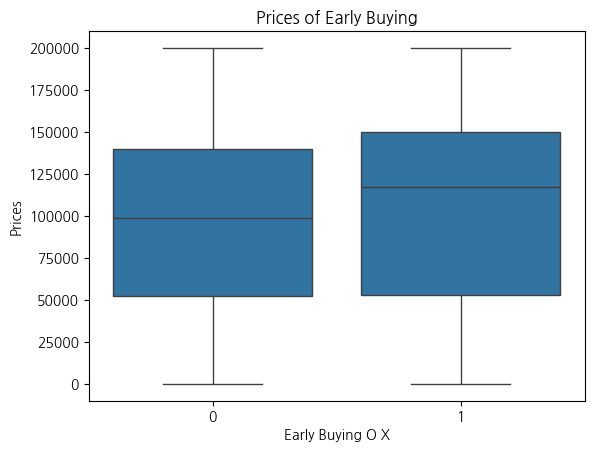

In [117]:
# 조기예매 별 예매 금액 박스플롯
sns.boxplot(x='조기예매', y='예매/취소금액', data=df_musical)
plt.title('Prices of Early Buying')
plt.xlabel('Early Buying O X')
plt.ylabel('Prices')
plt.show()

In [118]:
# 조기예매 별 성별 분포 비교
df_musical.groupby('조기예매')['성별'].value_counts()

조기예매  성별
0     2     16481
      1      9593
      0      4708
1     2     20223
      1      6938
      0      2293
Name: count, dtype: int64

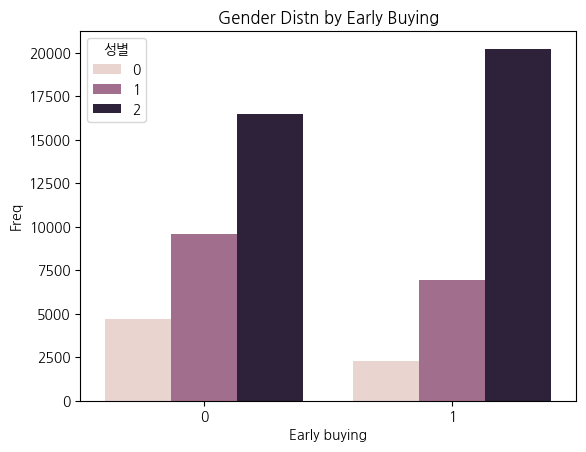

In [119]:
# 빈도수 계산
df_counts = df_musical.groupby(['조기예매', '성별']).size().reset_index(name='count')

# 막대 그래프 그리기
sns.barplot(x='조기예매', y='count', hue='성별', data=df_counts)
plt.title('Gender Distn by Early Buying')
plt.xlabel('Early buying')
plt.ylabel('Freq')
plt.show()

In [120]:
# 조기 예매 별 예매처 비교
df_musical.groupby('조기예매')['예매/취소방식명(관리시스템)'].value_counts()

조기예매  예매/취소방식명(관리시스템)
0     모바일                19512
      웹                  11270
1     모바일                17817
      웹                  11637
Name: count, dtype: int64

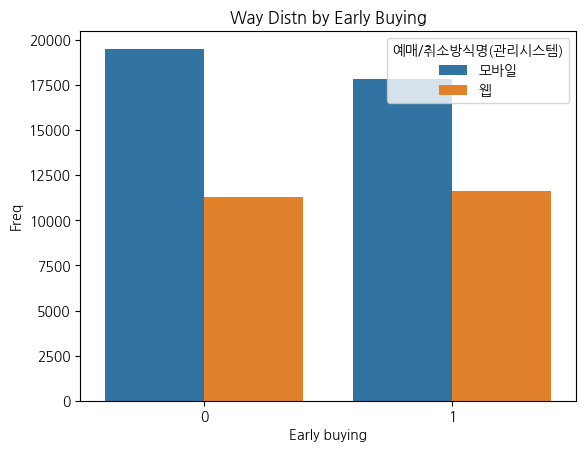

In [121]:
# 빈도수 계산
df_counts = df_musical.groupby(['조기예매', '예매/취소방식명(관리시스템)']).size().reset_index(name='count')

# 막대 그래프 그리기
sns.barplot(x='조기예매', y='count', hue='예매/취소방식명(관리시스템)', data=df_counts)
plt.title('Way Distn by Early Buying')
plt.xlabel('Early buying')
plt.ylabel('Freq')
plt.show()

### 좌석 등급

In [122]:
df_musical['좌석등급'].value_counts()

,count
좌석등급,
"VIP석(170000), R석(140000), S석(110000), A석(80000)",12365
"VIP석(190000), R석(160000), S석(130000), A석(90000), B석(70000)",4861
"VIP석(180000), R석(150000), S석(120000), A석(90000)",4801
"R석(66000), S석(55000)",3969
"VIP석(160000), S석(120000), A석(80000)",3160
스탠딩(121000),3107
"VIP석(150000), R석(130000), S석(90000), A석(60000)",2967
"VIP석(140000), OP석(130000), R석(110000), S석(90000), A석(70000)",2773
"OP석(150000), VIP석(150000), R석(130000), S석(100000), A석(70000), B석(50000)",1850


### 스타배우 영향

In [123]:
lst=['최정원', '고준희', '신성록', '차승원', '진선규', '엄기준', '양지원', '나문희', '봉태규', '김선영', '김수미', '고두심', '염혜란',
     '문소리', '박정원', '박은석', '박해수', '박소담', '정성일', '지현준', '이순재', '신구', '홍승안', '정휘', '전성우', '박정복', '전동석',
     '강홍석', '조승우', '옥주현', '정선아', '민경아', '김선영', '최재림', '전미도', '카이', '김준수', '홍강호', '박효신', '박강현', '정성화', '규현',
     '박은태', '박성훈', '조정석', '김승우', '지창욱', '홍광호', '신영숙', '차지연', '지창욱', '한지상', '마이클리', '김소현', '박건형', '윤공주', '바다', '서범석', '아이비']

# 스타배우 칼럼 추가
# 스타배우 칼럼 추가
# 스타배우 칼럼 추가
df_musical['스타배우'] = df_musical['출연진내용'].apply(
    lambda x: 1 if isinstance(x, str) and any(actor in x.split(', ') for actor in lst) else 0
)

df_musical['스타배우'].value_counts()

<ipython-input-123-1c1802cae482>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_musical['스타배우'] = df_musical['출연진내용'].apply(


,count
스타배우,
0,32473
1,27763


<ipython-input-124-89212be45ad8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_musical['파워'] = df_musical['장당금액'] * df_musical['좌석수']
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


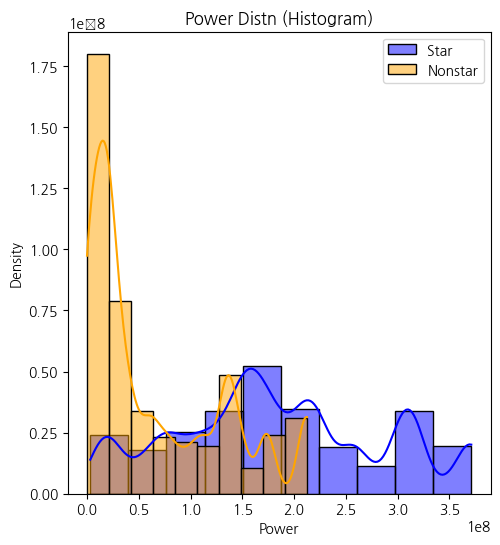

In [124]:
# 파워칼럼
# 파워 칼럼 계산: 장당금액 * 좌석 수
df_musical['파워'] = df_musical['장당금액'] * df_musical['좌석수']

# 스타배우 사용 여부에 따라 데이터 나누기
power_with_stars = df_musical[df_musical['스타배우'] == 1]['파워']
power_without_stars = df_musical[df_musical['스타배우'] == 0]['파워']

# 시각화
plt.figure(figsize=(12, 6))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(power_with_stars, bins=10, color='blue', kde=True, label='Star', stat='density')
sns.histplot(power_without_stars, bins=10, color='orange', kde=True, label='Nonstar', stat='density')
plt.title('Power Distn (Histogram)')
plt.xlabel('Power')
plt.ylabel('Density')
plt.legend()
plt.show()

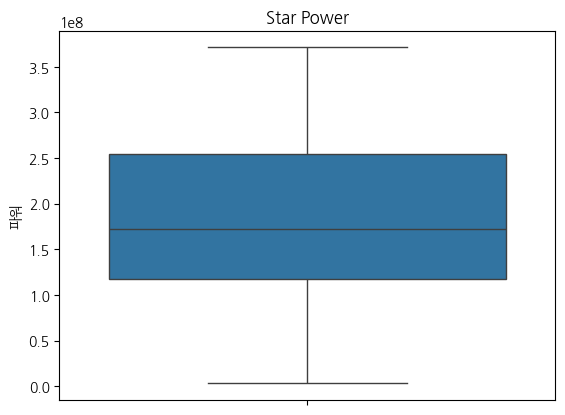

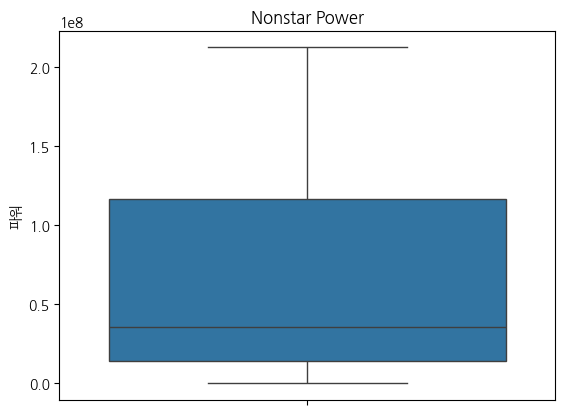

In [125]:
power_with_stars = df_musical[df_musical['스타배우'] == 1]['파워']
power_without_stars = df_musical[df_musical['스타배우'] == 0]['파워']

sns.boxplot(power_with_stars)
plt.title('Star Power')
plt.show()
sns.boxplot(power_without_stars)
plt.title('Nonstar Power')
plt.show()

## 상관관계 파악

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


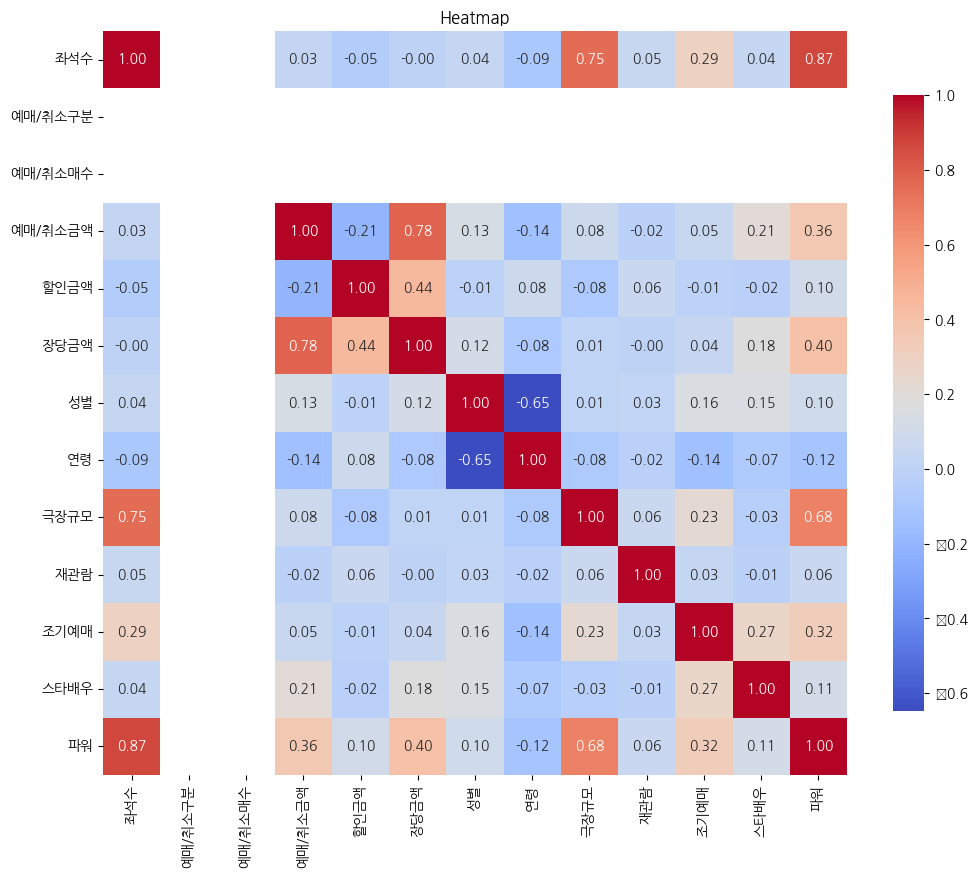

In [126]:
# 연극
# 데이터프레임의 수치형 칼럼만 선택
numeric_df = df_play.select_dtypes(include=[float, int])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


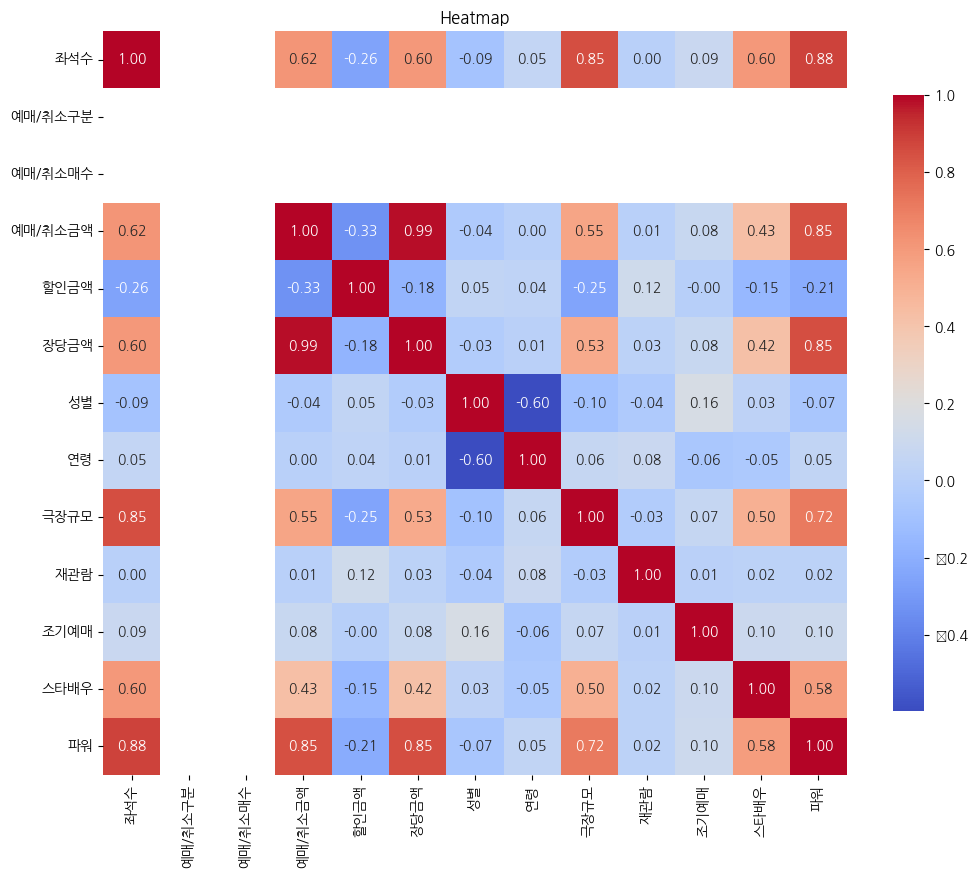

In [127]:
# 뮤지컬
# 데이터프레임의 수치형 칼럼만 선택
numeric_df = df_musical.select_dtypes(include=[float, int])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap')
plt.show()